# dictionary tree
-..

    -project_py   

    -2안_카셰어링데이터 - Carsharing_data(탑승내역)    
                       
                        - Carsharing_data(회원정보)

# 대전제
- 전국에 지점이 있는 카쉐어링 업체라 생각했고, 이에따라 한국 카쉐어링의 점유율을 알아보려 계획했으나, 해당 데이터는 LH / 수도권에 집중된 데이터라는 이야기를 듣고 계획을 수정.
- 두 데이터(회원내역, 탑승내역)의 누적 데이터가 상이하여 프로젝트 팀을 나눠 회사의 운영 상태를 데이터만 보고 유추하기로 함.
- 실제 업체 관계자와 데이터(누락,이상치,의미 등)를 분석해야하지만, 여의치않아 데이터만 가지고 분석을 하려함.

1. 2013- 9 -4 일 해당 서비스가 시작되었다고 가정.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
mpl.rc('font', family = 'Malgun Gothic')
mpl.rc('axes', unicode_minus = True)

pd.options.display.max_columns = 30
pd.options.display.max_rows = 1000

In [2]:
df2 = pd.read_excel("2안_카셰어링데이터/Carsharing_data(회원정보).xlsx")

연도별 분기별,월별,요일별 회원가입수 증가율 -> 시장점유율 파악
실사용자 연도별, 월별, 요일별 매출액을 파악해서 성별, 연령별, 지역,렌탈정보(대여존)확인
영업실적(매출)에 대해서 현재 회사의 시장점유율이 얼마나 되는지 알아보고 유지하고 성장할 수 있는지에 대해 예측해 본다. 

가입요일, 가입년, 가입월, 가입주, 가입년월, 가입년주,성별, 연령, 아이디, ADDR,탑승내역

# df2 = 회원정보
['아이디', '가입일', '정회원인증일', '회원등급', '멤버쉽', '가입요일', '가입년', '가입월', '가입주',
       '가입년월', '가입년주', '인증소요시간', '누적이용금액', '최초 탑승일시', '최근 탑승일시', '가입후 몇시간',
       '인증후 몇시간', '생년월', '성별', 'BIRTHDAY', 'ADDR', '거주단지', '세대수', '입주개시일',
       '단지 구분', '단지 유형', '영구혼합여부']
     
     
 - 카쉐이링 vs 렌트의 차이 : 빌리는 시간의 차이가 있다.

In [3]:
# 지역별 회원가입수 증가를 보기 위해 17개시도 column을 생성
df2["17개도시"] = df2["ADDR"].apply(lambda x: x.split(" ")[0])

In [4]:
# 분기별 회원가입수 증가를 보기 위해 17개시도 column을 생성
df2["분기"] = df2["가입월"].apply(lambda x : (x+2)//3) # 가입월 + 2 // 3 하면 분기를 구할 수 있음.

In [5]:
# 회원가입을 한 나이를 기준으로 회원가입 수 증가를 보기위해 생성
df2["BIRTHDAY"] = df2["BIRTHDAY"].apply(lambda x: x.split("-")[0])
df2["연령"] = df2["가입년"].astype(int) - df2["BIRTHDAY"].astype(int) + 1
df2["연령대"] = df2["연령"]//10 *10

# 회원데이터는 2013.9 ~ 2017.12까지 존재

# 서비스 시작 전부터 살던 사람 / 서비스 이후 이사온 회원의 추이를 보고싶음

In [6]:
temp_df2 = df2

In [7]:
temp_df2["입주개시일"].isnull().fillna("00:00:00")

0        False
1        False
2        False
3        False
4        False
         ...  
24518    False
24519    False
24520    False
24521    False
24522    False
Name: 입주개시일, Length: 24523, dtype: bool

In [8]:
temp_df2["입주개시일"].astype("str")

0        2017-01-10 00:00:00
1                   00:00:00
2        2014-09-15 00:00:00
3        2016-05-24 00:00:00
4        2016-12-28 00:00:00
                ...         
24518    2009-06-04 00:00:00
24519    2010-12-16 00:00:00
24520    2011-03-31 00:00:00
24521    2004-08-05 00:00:00
24522    2004-08-05 00:00:00
Name: 입주개시일, Length: 24523, dtype: object

In [9]:
df2

,아이디,가입일,정회원인증일,회원등급,멤버쉽,가입요일,가입년,가입월,가입주,가입년월,가입년주,인증소요시간,누적이용금액,최초 탑승일시,최근 탑승일시,...,인증후 몇시간,생년월,성별,BIRTHDAY,ADDR,거주단지,세대수,입주개시일,단지 구분,단지 유형,영구혼합여부,17개도시,분기,연령,연령대
0,jjin85,2017-12-31 21:53,2018-01-02 15:09,정회원,GRDA02,1,2017,12,52,17/12,2017/52,41,640.0,2017-12-31 23:40:00,2017-12-31 23:40:00,...,-39,85/12,여,1985,"서울특별시 송파구 백제고분로19길 30-9 (잠실동, 새서울하우스) 501호",대구금호천년나무5,1252.0,2017-01-10 00:00:00,LH,국민,순수 국민,서울특별시,4,33,30
1,ataumuna,2017-12-31 19:01,2018-01-01 15:12,준회원,GRDA02,1,2017,12,52,17/12,2017/52,20,NaN,NaT,NaT,...,0,86/10,여,1986,서울특별시 성북구 인촌로7가길 56 (안암동2가) 103호,고려대 하나스퀘어,0.0,00:00:00,민간,민간,민간,서울특별시,4,32,30
2,dbsgml7788,2017-12-31 17:53,NaN,준회원,GRDA01,1,2017,12,52,17/12,2017/52,0,NaN,NaT,NaT,...,0,93/03,여,1993,경기도 고양시 덕양구 원흥동 669 삼송마을14단지아파트 14단지 1403 동106,고양삼송14,930.0,2014-09-15 00:00:00,LH,국민,순수 국민,경기도,4,25,20
3,1004dyddlf,2017-12-31 17:26,2017-12-31 17:29,정회원,GRDA02,1,2017,12,52,17/12,2017/52,0,NaN,NaT,NaT,...,0,90/08,남,1990,"대구광역시 북구 내곡로 15 (사수동, 대구금호엘에이치천년나무8단지) 802동809호",대구금호천년나무8,1022.0,2016-05-24 00:00:00,LH,국민,순수 국민,대구광역시,4,28,20
4,sss908,2017-12-31 15:36,2018-01-02 15:10,정회원,GRDA02,1,2017,12,52,17/12,2017/52,48,57140.0,2018-01-20 11:00:00,2018-01-20 11:00:00,...,428,89/03,남,1989,울산광역시 남구 야음동 564-4 우방유화아파트 101동 908호,고양삼송원흥11(행복주택),832.0,2016-12-28 00:00:00,LH,행복,행복,울산광역시,4,29,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24518,hyundongong,2013-09-12 00:00,NaN,준회원,GRDA01,5,2013,9,37,13/09,2013/37,0,NaN,NaT,NaT,...,0,72/08,남,1972,광주광역시 광산구 신가동 아름마을휴먼시아2단지아파트 207-702 (퇴거),광주아름2,996.0,2009-06-04 00:00:00,LH-불발,국민,순수 국민,광주광역시,3,42,40
24519,yoosh13,2013-09-12 00:00,NaN,정회원,GRDA02,5,2013,9,37,13/09,2013/37,0,NaN,NaT,NaT,...,0,81/10,남,1981,인천광역시 남동구 논현동 A3블럭 소래휴먼시아 324동 702호,인천소래3,2026.0,2010-12-16 00:00:00,LH,국민,순수 국민,인천광역시,3,33,30
24520,sg5988,2013-09-12 00:00,NaN,정회원,GRDA02,5,2013,9,37,13/09,2013/37,0,NaN,NaT,NaT,...,0,49/12,남,1949,경기도 성남시 분당구 삼평동 봇들마을6단지아파트 607동702호,성남판교봇들6,1297.0,2011-03-31 00:00:00,LH,국민,순수 국민,경기도,3,65,60
24521,rlewis,2013-09-12 00:00,NaN,정회원,GRDA02,5,2013,9,37,13/09,2013/37,0,13850.0,2016-04-22 14:00:00,2016-12-20 12:20:00,...,1019582,84/06,여,1984,인천광역시 부평구 삼산2동 삼산타운주공아파트4단지 407동 1110호,인천삼산4,1696.0,2004-08-05 00:00:00,LH,국민,순수 국민,인천광역시,3,30,30


In [10]:
#입주 개시일이 없으면, 해당 회원이 서비스 이전/이후 에 들어온지 판단 할 수 없어서 제외.
temp_df2.loc[temp_df2["입주개시일"].astype("str") == '00:00:00',"입주개시일"] = np.NaN

In [11]:
temp_df2[temp_df2["입주개시일"].isnull()]

,아이디,가입일,정회원인증일,회원등급,멤버쉽,가입요일,가입년,가입월,가입주,가입년월,가입년주,인증소요시간,누적이용금액,최초 탑승일시,최근 탑승일시,...,인증후 몇시간,생년월,성별,BIRTHDAY,ADDR,거주단지,세대수,입주개시일,단지 구분,단지 유형,영구혼합여부,17개도시,분기,연령,연령대
1,ataumuna,2017-12-31 19:01,2018-01-01 15:12,준회원,GRDA02,1,2017,12,52,17/12,2017/52,20,NaN,NaT,NaT,...,0,86/10,여,1986,서울특별시 성북구 인촌로7가길 56 (안암동2가) 103호,고려대 하나스퀘어,0.0,NaN,민간,민간,민간,서울특별시,4,32,30
55,geon96,2017-12-28 17:50,2017-12-29 13:37,정회원,GRDA02,5,2017,12,52,17/12,2017/52,20,NaN,NaT,NaT,...,0,96/05,남,1996,서울특별시 종로구 대학로11길 38-21 (명륜4가) 101호,고려대 하나스퀘어,0.0,NaN,민간,민간,민간,서울특별시,4,22,20
64,zw1406,2017-12-28 12:18,2017-12-28 12:21,정회원,GRDA02,5,2017,12,52,17/12,2017/52,0,NaN,NaT,NaT,...,0,91/02,남,1991,서울특별시 성북구 안암동5가 1-2 고려대학교안암캠퍼스 제2실험동 302호,고려대 하나스퀘어,0.0,NaN,민간,민간,민간,서울특별시,4,27,20
97,cupido8304,2017-12-26 08:38,NaN,준회원,GRDA01,3,2017,12,52,17/12,2017/52,0,NaN,NaT,NaT,...,0,83/04,남,1983,"서울특별시 서대문구 북아현로1가길 20 (북아현동, e편한세상신촌 1단지) 106동",幸福 래디우스랩(미사용),0.0,NaN,RL,업무용,RL,서울특별시,4,35,30
104,sneakersa,2017-12-25 19:45,2017-12-25 19:49,정회원,GRDA02,2,2017,12,52,17/12,2017/52,0,12040.0,2017-12-25 21:00:00,2017-12-25 21:00:00,...,1,90/01,남,1990,서울특별시 광진구 자양로44길 97 (구의동) 가동106호,고려대 하나스퀘어,0.0,NaN,민간,민간,민간,서울특별시,4,28,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24090,coolj07,2013-10-23 00:00,2013-10-23 15:20,정회원,GRDA02,4,2013,10,43,13/10,2013/43,15,NaN,NaT,NaT,...,0,73/03,여,1973,대구광역시 동구 율하동 율하휴먼시아7단지아파트 709동 706호,NaN,NaN,NaN,NaN,NaN,NaN,대구광역시,4,41,40
24171,calli6393,2013-10-16 00:00,2013-10-17 06:28,정회원,GRDA02,4,2013,10,42,13/10,2013/42,30,NaN,NaT,NaT,...,0,56/04,여,1956,대구광역시 동구 율하동 율하휴먼시아6단지아파트 607동 805호,NaN,NaN,NaN,NaN,NaN,NaN,대구광역시,4,58,50
24198,pa0519,2013-10-13 00:00,2013-10-15 20:52,정회원,GRDA02,1,2013,10,41,13/10,2013/41,69,NaN,NaT,NaT,...,0,66/03,여,1966,대구광역시 동구 율하동 율하휴먼시아7단지아파트 705동102호,NaN,NaN,NaN,NaN,NaN,NaN,대구광역시,4,48,40
24412,newday94,2013-09-26 00:00,2013-10-04 16:34,정회원,GRDA02,5,2013,9,39,13/09,2013/39,209,NaN,NaT,NaT,...,0,66/01,남,1966,서울특별시 성북구 하월곡동 226 월곡래미안 루나밸리102-404,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시,3,48,40


In [12]:
temp_df2["입주개시일"] = temp_df2[~(temp_df2["입주개시일"].isnull())]["입주개시일"].astype("str").apply(lambda x : x.split(" ")[0])

In [13]:
temp_df2[['가입일', '입주개시일']]

,가입일,입주개시일
0,2017-12-31 21:53,2017-01-10
1,2017-12-31 19:01,NaN
2,2017-12-31 17:53,2014-09-15
3,2017-12-31 17:26,2016-05-24
4,2017-12-31 15:36,2016-12-28
...,...,...
24518,2013-09-12 00:00,2009-06-04
24519,2013-09-12 00:00,2010-12-16
24520,2013-09-12 00:00,2011-03-31
24521,2013-09-12 00:00,2004-08-05


# 가입시간에 따라 회원가입의 추이가 있지않을까?  
# >가입일 + 시간 = 서로 다른 colums으로 처리

In [14]:
temp_df2["가입시간"] = temp_df2["가입일"].apply(lambda x: x.split(" ")[1].split(":")[0])
temp_df2["가입일"] = temp_df2["가입일"].apply(lambda x: x.split(" ")[0])

In [15]:
temp_df2["가입일"] = temp_df2["가입일"].apply(lambda x: x.split(" ")[0])

In [16]:
temp_df2

,아이디,가입일,정회원인증일,회원등급,멤버쉽,가입요일,가입년,가입월,가입주,가입년월,가입년주,인증소요시간,누적이용금액,최초 탑승일시,최근 탑승일시,...,생년월,성별,BIRTHDAY,ADDR,거주단지,세대수,입주개시일,단지 구분,단지 유형,영구혼합여부,17개도시,분기,연령,연령대,가입시간
0,jjin85,2017-12-31,2018-01-02 15:09,정회원,GRDA02,1,2017,12,52,17/12,2017/52,41,640.0,2017-12-31 23:40:00,2017-12-31 23:40:00,...,85/12,여,1985,"서울특별시 송파구 백제고분로19길 30-9 (잠실동, 새서울하우스) 501호",대구금호천년나무5,1252.0,2017-01-10,LH,국민,순수 국민,서울특별시,4,33,30,21
1,ataumuna,2017-12-31,2018-01-01 15:12,준회원,GRDA02,1,2017,12,52,17/12,2017/52,20,NaN,NaT,NaT,...,86/10,여,1986,서울특별시 성북구 인촌로7가길 56 (안암동2가) 103호,고려대 하나스퀘어,0.0,NaN,민간,민간,민간,서울특별시,4,32,30,19
2,dbsgml7788,2017-12-31,NaN,준회원,GRDA01,1,2017,12,52,17/12,2017/52,0,NaN,NaT,NaT,...,93/03,여,1993,경기도 고양시 덕양구 원흥동 669 삼송마을14단지아파트 14단지 1403 동106,고양삼송14,930.0,2014-09-15,LH,국민,순수 국민,경기도,4,25,20,17
3,1004dyddlf,2017-12-31,2017-12-31 17:29,정회원,GRDA02,1,2017,12,52,17/12,2017/52,0,NaN,NaT,NaT,...,90/08,남,1990,"대구광역시 북구 내곡로 15 (사수동, 대구금호엘에이치천년나무8단지) 802동809호",대구금호천년나무8,1022.0,2016-05-24,LH,국민,순수 국민,대구광역시,4,28,20,17
4,sss908,2017-12-31,2018-01-02 15:10,정회원,GRDA02,1,2017,12,52,17/12,2017/52,48,57140.0,2018-01-20 11:00:00,2018-01-20 11:00:00,...,89/03,남,1989,울산광역시 남구 야음동 564-4 우방유화아파트 101동 908호,고양삼송원흥11(행복주택),832.0,2016-12-28,LH,행복,행복,울산광역시,4,29,20,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24518,hyundongong,2013-09-12,NaN,준회원,GRDA01,5,2013,9,37,13/09,2013/37,0,NaN,NaT,NaT,...,72/08,남,1972,광주광역시 광산구 신가동 아름마을휴먼시아2단지아파트 207-702 (퇴거),광주아름2,996.0,2009-06-04,LH-불발,국민,순수 국민,광주광역시,3,42,40,00
24519,yoosh13,2013-09-12,NaN,정회원,GRDA02,5,2013,9,37,13/09,2013/37,0,NaN,NaT,NaT,...,81/10,남,1981,인천광역시 남동구 논현동 A3블럭 소래휴먼시아 324동 702호,인천소래3,2026.0,2010-12-16,LH,국민,순수 국민,인천광역시,3,33,30,00
24520,sg5988,2013-09-12,NaN,정회원,GRDA02,5,2013,9,37,13/09,2013/37,0,NaN,NaT,NaT,...,49/12,남,1949,경기도 성남시 분당구 삼평동 봇들마을6단지아파트 607동702호,성남판교봇들6,1297.0,2011-03-31,LH,국민,순수 국민,경기도,3,65,60,00
24521,rlewis,2013-09-12,NaN,정회원,GRDA02,5,2013,9,37,13/09,2013/37,0,13850.0,2016-04-22 14:00:00,2016-12-20 12:20:00,...,84/06,여,1984,인천광역시 부평구 삼산2동 삼산타운주공아파트4단지 407동 1110호,인천삼산4,1696.0,2004-08-05,LH,국민,순수 국민,인천광역시,3,30,30,00


# 2013 - 9- 4일 기준 기존/ 유입 고객의 회원가입 추이를 위해 처리

In [17]:
temp_df2.loc[temp_df2["입주개시일"] <= "2013-09-03","고객유형"] = "기존자원"

In [18]:
temp_df2.loc[temp_df2["입주개시일"] >= "2013-09-04","고객유형"] = "유입자원"

In [19]:
temp_df2

,아이디,가입일,정회원인증일,회원등급,멤버쉽,가입요일,가입년,가입월,가입주,가입년월,가입년주,인증소요시간,누적이용금액,최초 탑승일시,최근 탑승일시,...,성별,BIRTHDAY,ADDR,거주단지,세대수,입주개시일,단지 구분,단지 유형,영구혼합여부,17개도시,분기,연령,연령대,가입시간,고객유형
0,jjin85,2017-12-31,2018-01-02 15:09,정회원,GRDA02,1,2017,12,52,17/12,2017/52,41,640.0,2017-12-31 23:40:00,2017-12-31 23:40:00,...,여,1985,"서울특별시 송파구 백제고분로19길 30-9 (잠실동, 새서울하우스) 501호",대구금호천년나무5,1252.0,2017-01-10,LH,국민,순수 국민,서울특별시,4,33,30,21,유입자원
1,ataumuna,2017-12-31,2018-01-01 15:12,준회원,GRDA02,1,2017,12,52,17/12,2017/52,20,NaN,NaT,NaT,...,여,1986,서울특별시 성북구 인촌로7가길 56 (안암동2가) 103호,고려대 하나스퀘어,0.0,NaN,민간,민간,민간,서울특별시,4,32,30,19,NaN
2,dbsgml7788,2017-12-31,NaN,준회원,GRDA01,1,2017,12,52,17/12,2017/52,0,NaN,NaT,NaT,...,여,1993,경기도 고양시 덕양구 원흥동 669 삼송마을14단지아파트 14단지 1403 동106,고양삼송14,930.0,2014-09-15,LH,국민,순수 국민,경기도,4,25,20,17,유입자원
3,1004dyddlf,2017-12-31,2017-12-31 17:29,정회원,GRDA02,1,2017,12,52,17/12,2017/52,0,NaN,NaT,NaT,...,남,1990,"대구광역시 북구 내곡로 15 (사수동, 대구금호엘에이치천년나무8단지) 802동809호",대구금호천년나무8,1022.0,2016-05-24,LH,국민,순수 국민,대구광역시,4,28,20,17,유입자원
4,sss908,2017-12-31,2018-01-02 15:10,정회원,GRDA02,1,2017,12,52,17/12,2017/52,48,57140.0,2018-01-20 11:00:00,2018-01-20 11:00:00,...,남,1989,울산광역시 남구 야음동 564-4 우방유화아파트 101동 908호,고양삼송원흥11(행복주택),832.0,2016-12-28,LH,행복,행복,울산광역시,4,29,20,15,유입자원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24518,hyundongong,2013-09-12,NaN,준회원,GRDA01,5,2013,9,37,13/09,2013/37,0,NaN,NaT,NaT,...,남,1972,광주광역시 광산구 신가동 아름마을휴먼시아2단지아파트 207-702 (퇴거),광주아름2,996.0,2009-06-04,LH-불발,국민,순수 국민,광주광역시,3,42,40,00,기존자원
24519,yoosh13,2013-09-12,NaN,정회원,GRDA02,5,2013,9,37,13/09,2013/37,0,NaN,NaT,NaT,...,남,1981,인천광역시 남동구 논현동 A3블럭 소래휴먼시아 324동 702호,인천소래3,2026.0,2010-12-16,LH,국민,순수 국민,인천광역시,3,33,30,00,기존자원
24520,sg5988,2013-09-12,NaN,정회원,GRDA02,5,2013,9,37,13/09,2013/37,0,NaN,NaT,NaT,...,남,1949,경기도 성남시 분당구 삼평동 봇들마을6단지아파트 607동702호,성남판교봇들6,1297.0,2011-03-31,LH,국민,순수 국민,경기도,3,65,60,00,기존자원
24521,rlewis,2013-09-12,NaN,정회원,GRDA02,5,2013,9,37,13/09,2013/37,0,13850.0,2016-04-22 14:00:00,2016-12-20 12:20:00,...,여,1984,인천광역시 부평구 삼산2동 삼산타운주공아파트4단지 407동 1110호,인천삼산4,1696.0,2004-08-05,LH,국민,순수 국민,인천광역시,3,30,30,00,기존자원


In [20]:
df3 = temp_df2[~temp_df2["입주개시일"].isnull()]

# 가입일이 2013 - 09 -04 부터 있는 걸로 보아 회사의 서비스가 이때부터 시작했다고 가정.

 - 1. 서비스가 시작되기 전부터 이미 거주하고 있던 사람들이 해당 서비스를 언제 가입했는지 연도별/ 성별로 보고싶음.
 - 2. 서비스가 시작되고 나서 입주를 한 사람들은 중 해당 서비스를 언제 가입했는지 연도별/ 성별로 보고싶음.


# 기존시장과 유입시장을 나눠 분석하고자 함

# 1. 기존시장(= 2013-09-04)이전 거주하던 사람들이 몇년도에 가입했는가?

In [21]:
df3[df3["입주개시일"] <= "2013-09-03"].sort_values(by="입주개시일")

,아이디,가입일,정회원인증일,회원등급,멤버쉽,가입요일,가입년,가입월,가입주,가입년월,가입년주,인증소요시간,누적이용금액,최초 탑승일시,최근 탑승일시,...,성별,BIRTHDAY,ADDR,거주단지,세대수,입주개시일,단지 구분,단지 유형,영구혼합여부,17개도시,분기,연령,연령대,가입시간,고객유형
23284,yunsirbang,2013-12-13,2013-12-13 14:03,정회원,GRDA02,6,2013,12,50,13/12,2013/50,14,NaN,NaT,NaT,...,남,1961,서울특별시 강북구 번3동 주공아파트 3단지 관리사무소,서울번동3,1292.0,1990-10-27,LH,영구,순수 영구,서울특별시,4,53,50,00,기존자원
24159,exponential,2013-10-18,2016-09-23 15:27,정회원,GRDA02,6,2013,10,42,13/10,2013/42,25719,518611.0,2016-03-05 09:30:00,2017-08-29 20:40:00,...,여,1982,서울특별시 강북구 번3동 주공아파트 305동 311호,서울번동3,1292.0,1990-10-27,LH,영구,순수 영구,서울특별시,4,32,30,00,기존자원
17061,opt4life,2016-07-13,NaN,준회원,GRDA01,4,2016,7,29,16/07,2016/29,0,NaN,NaT,NaT,...,남,1977,서울특별시 강북구 한천로105길 23 109-602,서울번동3,1292.0,1990-10-27,LH,영구,순수 영구,서울특별시,3,40,40,00,기존자원
19815,riversuha,2015-07-31,2015-11-23 17:31,정회원,GRDA02,6,2015,7,31,15/07,2015/31,2778,253580.0,2016-02-15 22:00:00,2017-05-21 14:00:00,...,여,1978,서울특별시 강북구 번3동 주공아파트 304동 809호,서울번동3,1292.0,1990-10-27,LH,영구,순수 영구,서울특별시,3,38,30,00,기존자원
19818,dlscjf8969,2015-07-30,2015-07-31 09:02,정회원,GRDA04,5,2015,7,31,15/07,2015/31,33,1204920.0,2016-01-22 19:00:00,2018-01-01 12:10:00,...,남,1965,서울특별시 강북구 번동 주공아파트306동803호,서울번동3,1292.0,1990-10-27,LH,영구,순수 영구,서울특별시,3,51,50,00,기존자원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12963,dorjang,2016-12-05,2016-12-05 22:38,정회원,GRDA02,2,2016,12,50,16/12,2016/50,0,NaN,NaT,NaT,...,여,1983,"경기도 고양시 덕양구 오금로 7 (신원동, 신원마을엘에이치3단지) 305-1405",고양삼송신원3,866.0,2013-06-28,LH,국민,순수 국민,경기도,4,34,30,22,기존자원
16943,Fwanny,2016-07-16,2016-08-11 15:23,정회원,GRDA02,7,2016,7,29,16/07,2016/29,639,51580.0,2016-07-31 19:00:00,2016-11-11 12:00:00,...,여,1988,경기도 고양시 덕양구 오금로 7 307동1106호,고양삼송신원3,866.0,2013-06-28,LH,국민,순수 국민,경기도,3,29,20,00,기존자원
16948,kkacmn,2016-07-16,2016-09-23 15:27,정회원,GRDA02,7,2016,7,29,16/07,2016/29,1671,54420.0,2016-09-06 12:30:00,2016-09-06 12:30:00,...,남,1985,경기도 고양시 덕양구 오금로 7 305_301,고양삼송신원3,866.0,2013-06-28,LH,국민,순수 국민,경기도,3,32,30,00,기존자원
5849,monaco,2017-06-25,2017-06-25 21:18,정회원,GRDA02,1,2017,6,25,17/06,2017/25,4,NaN,NaT,NaT,...,남,1974,"경기도 고양시 덕양구 오금로 7 (신원동, 신원마을엘에이치3단지) 307동907호",고양삼송신원3,866.0,2013-06-28,LH,국민,순수 국민,경기도,2,44,40,17,기존자원


# 2. 기존시장(= 2013-09-04)이후 거주하러 들어온 사람들이 해당 서비스를 몇년도에 가입했는가?

In [22]:
df3[df3["입주개시일"] >= "2013-09-04"].sort_values(by="입주개시일")

,아이디,가입일,정회원인증일,회원등급,멤버쉽,가입요일,가입년,가입월,가입주,가입년월,가입년주,인증소요시간,누적이용금액,최초 탑승일시,최근 탑승일시,...,성별,BIRTHDAY,ADDR,거주단지,세대수,입주개시일,단지 구분,단지 유형,영구혼합여부,17개도시,분기,연령,연령대,가입시간,고객유형
3925,wjddms7946,2017-08-02,2017-08-02 00:16,정회원,GRDA02,4,2017,8,31,17/08,2017/31,0,25200.0,2017-08-02 00:40:00,2017-12-06 16:00:00,...,여,1981,"경기도 성남시 분당구 동판교로 91 (백현동, 백현마을4단지) 401-2404",성남백현4,1974.0,2013-09-12,LH,국민,순수 국민,경기도,3,37,30,00,유입자원
21958,imodeli,2014-06-28,NaN,준회원,GRDA01,7,2014,6,26,14/06,2014/26,0,NaN,NaT,NaT,...,여,1986,경기도 성남시 분당구 백현동 백현마을 414-1503,성남백현4,1974.0,2013-09-12,LH,국민,순수 국민,경기도,2,29,20,00,유입자원
7530,jccheong,2017-05-15,2017-05-16 17:48,정회원,GRDA02,2,2017,5,20,17/05,2017/20,22,NaN,NaT,NaT,...,남,1957,"경기도 성남시 분당구 장미로 139 (야탑동, 매화마을주공2단지아파트) 212동 1...",성남백현4,1974.0,2013-09-12,LH,국민,순수 국민,경기도,2,61,60,20,유입자원
16681,jinokk,2016-07-24,2016-08-10 15:04,정회원,GRDA02,1,2016,7,30,16/07,2016/30,423,NaN,NaT,NaT,...,여,1969,경기도 성남시 분당구 동판교로 91 백현마을4단지404-1002,성남백현4,1974.0,2013-09-12,LH,국민,순수 국민,경기도,3,48,40,00,유입자원
21959,jine21kr,2014-06-28,2014-06-30 10:27,정회원,GRDA02,7,2014,6,26,14/06,2014/26,58,85740.0,2016-01-02 17:40:00,2017-01-08 09:00:00,...,여,1962,경기도 성남시 분당구 백현동 백현마을 4단지 417동 705호,성남백현4,1974.0,2013-09-12,LH,국민,순수 국민,경기도,2,53,50,00,유입자원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489,lovestorykim,2017-09-12,2017-09-15 16:38,정회원,GRDA02,3,2017,9,37,17/09,2017/37,72,10770.0,2017-09-18 10:30:00,2017-11-08 01:30:00,...,남,1989,"서울특별시 영등포구 시흥대로 595 (대림동, H HOUSE 대림 뉴스테이) 102...",H HOUSE 대림,291.0,2017-09-15,민간,민간,민간,서울특별시,3,29,20,16,유입자원
700,eunseon007,2017-11-27,NaN,준회원,GRDA01,2,2017,11,48,17/11,2017/48,0,NaN,NaT,NaT,...,남,1973,서울특별시 금천구 시흥대로40다길 6 (시흥동) 102호,H HOUSE 대림,291.0,2017-09-15,민간,민간,민간,서울특별시,4,45,40,00,유입자원
686,misosh,2017-11-27,2017-11-30 12:58,정회원,GRDA03,2,2017,11,48,17/11,2017/48,64,75450.0,2017-12-02 07:30:00,2017-12-31 09:00:00,...,남,1981,"서울특별시 영등포구 시흥대로 595 (대림동, H HOUSE 대림 뉴스테이) 101...",H HOUSE 대림,291.0,2017-09-15,민간,민간,민간,서울특별시,4,37,30,20,유입자원
435,sungw00,2017-12-10,NaN,준회원,GRDA01,1,2017,12,49,17/12,2017/49,0,NaN,NaT,NaT,...,남,1977,"서울특별시 영등포구 시흥대로 595 (대림동, H HOUSE 대림 뉴스테이) 101...",H HOUSE 대림,291.0,2017-09-15,민간,민간,민간,서울특별시,4,41,40,17,유입자원


# temp_df2 = 원본데이터 /df3 입주개시일이 없는 고객 삭제 테이블

In [23]:
df3["입주개시일"].isnull().value_counts()

False    22573
Name: 입주개시일, dtype: int64

In [24]:
temp_df2[["입주개시일"]].isnull()

,입주개시일
0,False
1,True
2,False
3,False
4,False
...,...
24518,False
24519,False
24520,False
24521,False


# 만 나이로 계산하다 보니 10대의 총 데이터 수가 많지 않아, 20대로 편입

In [25]:
temp_df2.loc[temp_df2["연령"] == 19, "연령대"] = 20

In [26]:
temp_df2[temp_df2["연령"] == 19]

,아이디,가입일,정회원인증일,회원등급,멤버쉽,가입요일,가입년,가입월,가입주,가입년월,가입년주,인증소요시간,누적이용금액,최초 탑승일시,최근 탑승일시,...,성별,BIRTHDAY,ADDR,거주단지,세대수,입주개시일,단지 구분,단지 유형,영구혼합여부,17개도시,분기,연령,연령대,가입시간,고객유형
12938,peterpanbbo,2016-12-06,2016-12-06 17:14,정회원,GRDA02,3,2016,12,50,16/12,2016/50,0,NaN,NaT,NaT,...,남,1998,"경기도 양주시 고읍북로 120 (만송동, 은빛마을 휴먼시아) 804동406호",양주고읍8,1124.0,2010-05-03,LH,국민,순수 국민,경기도,4,19,20,17,기존자원
12980,kangmj0124,2016-12-05,NaN,준회원,GRDA01,2,2016,12,50,16/12,2016/50,0,NaN,NaT,NaT,...,여,1998,경기도 남양주시 진접읍 해밀예당1로 295 (휴먼시아24단지아파트) 2407동1001호,남양주진접24,1138.0,2010-06-25,LH,국민,순수 국민,경기도,4,19,20,12,기존자원
13032,shk5220,2016-12-02,2016-12-02 21:31,준회원,GRDA02,6,2016,12,49,16/12,2016/49,0,NaN,NaT,NaT,...,남,1998,"인천광역시 남동구 남촌로122번길 57 (남촌동, 삼화빌라) 202호",인천삼산4,1696.0,2004-08-05,LH,국민,순수 국민,인천광역시,4,19,20,21,기존자원
13611,ccr98,2016-11-23,NaN,준회원,GRDA01,4,2016,11,48,16/11,2016/48,0,NaN,NaT,NaT,...,여,1998,경기도 용인시 기흥구 동백8로 173-12 (동백동) 2904동 1403호,용인동백백현9,981.0,2006-06-01,LH,국민,순수 국민,경기도,4,19,20,14,기존자원
14257,berry012,2016-11-05,NaN,준회원,GRDA01,7,2016,11,45,16/11,2016/45,0,NaN,NaT,NaT,...,여,1998,"경기도 고양시 덕양구 오금2로 26 (신원동, 신원마을엘에이치2단지) 신원마을211...",고양삼송신원2,1495.0,2013-05-30,LH,국민,순수 국민,경기도,4,19,20,13,기존자원
14292,hosun301,2016-11-04,NaN,준회원,GRDA01,6,2016,11,45,16/11,2016/45,0,NaN,NaT,NaT,...,남,1998,"경기도 성남시 분당구 동판교로 91 (백현동, 백현마을4단지) 백현마을 4단지 40...",성남백현4,1974.0,2013-09-12,LH,국민,순수 국민,경기도,4,19,20,15,유입자원
14519,ps7823,2016-10-28,NaN,준회원,GRDA01,6,2016,10,44,16/10,2016/44,0,NaN,NaT,NaT,...,남,1998,경기도 수원시 권선구 서수원로594번길 137 (입북동) 휴먼시아 403동 1202,수원호매실4,980.0,2011-07-27,LH,국민,순수 국민,경기도,4,19,20,17,기존자원

































1. 지역별 유의미한 가입자 수 차이가 없다
1. 연령별 유의미한 가입자 수 차이가 없다            >>> 이러한 피쳐들이 가입자 수에 영향을 주지 않을 것이다.?
1. 성별 유의미한 가입자 수 차이가 없다
1. 고객유형별 유의미한 가입자 수 차이가 없다





In [117]:
df3["아이디","가입일","멤버쉽",'가입요일',"가입년","가입월","누적이용금액","BIRTHDAY","17개도시",
    "연령대","고객유형","가입요일toEng"]

KeyError: ('아이디', '가입일', '멤버쉽', '가입요일', '가입년', '가입월', '누적이용금액', 'BIRTHDAY', '17개도시', '연령대', '고객유형', '가입요일toEng')

# 지역/연령/성별/고객유형별에 따라 회원가입 증가 표시

# 연도별 증가 회원 수

In [27]:

plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기

Text(0, 0.5, '회원가입 수')

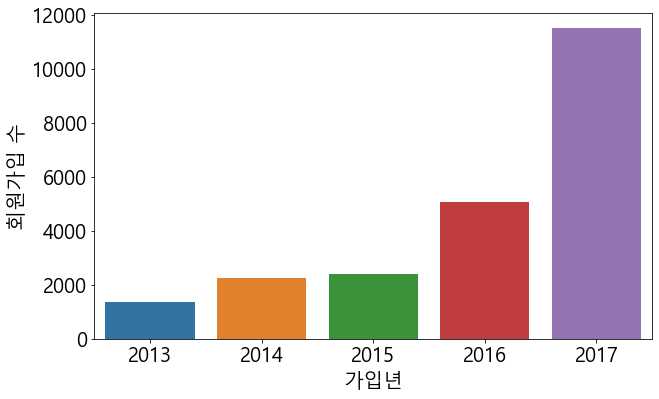

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(data = df3 , x = "가입년")
plt.ylabel("회원가입 수")

Text(0, 0.5, '회원가입 수')

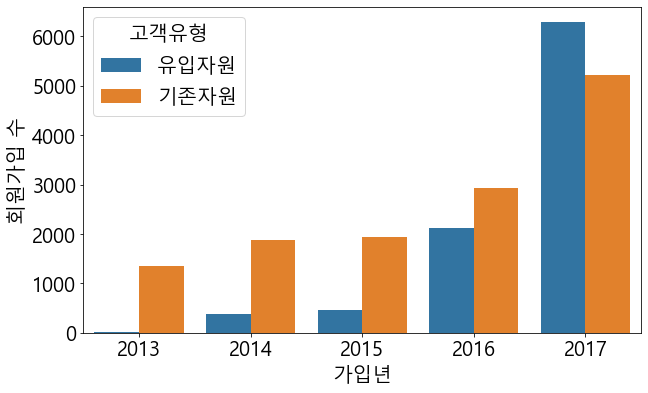

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(data = df3 , x = "가입년",hue = "고객유형")
plt.ylabel("회원가입 수")

In [30]:
df3["가입년_가입월"] = df3["가입년"].astype("str")+"-"+ df3["가입월"].astype("str") 

C:\Users\user\AppData\Local\Temp/ipykernel_5272/1603286007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["가입년_가입월"] = df3["가입년"].astype("str")+"-"+ df3["가입월"].astype("str")


# 년도별 가입자 평균 누적이용금액 평균
- 평균적으로 비슷한 금액은 사용함

In [31]:
#

In [32]:
df3["누적이용금액"]

0          640.0
2            NaN
3            NaN
4        57140.0
5        15730.0
          ...   
24518        NaN
24519        NaN
24520        NaN
24521    13850.0
24522        NaN
Name: 누적이용금액, Length: 22573, dtype: float64

Text(0, 0.5, '평균이용금액')

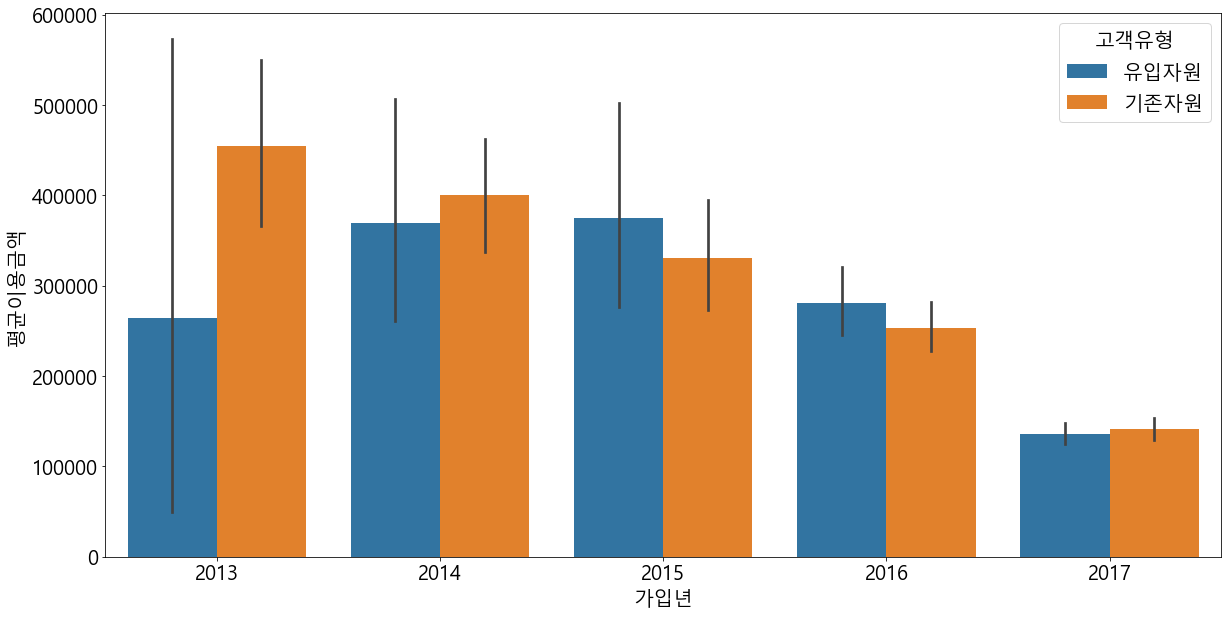

In [33]:
plt.figure(figsize=(20,10))
sns.barplot(data = df3 , x = "가입년", y = "누적이용금액",hue="고객유형")
plt.ylabel("평균이용금액")

In [34]:
df3.groupby(["고객유형","가입년"])["누적이용금액"].mean()

고객유형  가입년 
기존자원  2013    454410.341538
      2014    400131.193548
      2015    330805.459829
      2016    253255.839938
      2017    141007.195484
유입자원  2013    264105.000000
      2014    368957.634328
      2015    374662.395480
      2016    280728.363636
      2017    136115.651424
Name: 누적이용금액, dtype: float64

In [35]:
df4 = df3[df3["입주개시일"] <= df3["가입일"]]

<AxesSubplot:xlabel='가입년_가입월', ylabel='count'>

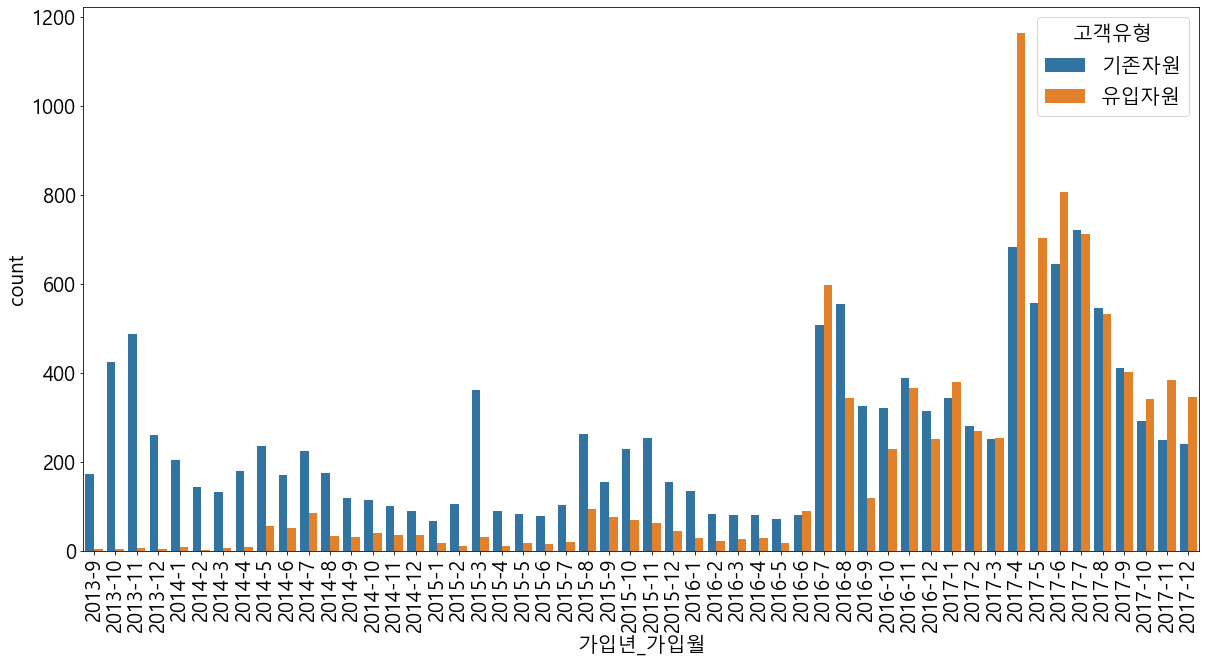

In [36]:
plt.figure(figsize=(20,10))
plt.xticks(rotation =90)
sns.countplot(data = df3.sort_values(by=["가입년","가입월"]) , x = "가입년_가입월",hue = "고객유형")

<AxesSubplot:xlabel='가입년_가입월', ylabel='count'>

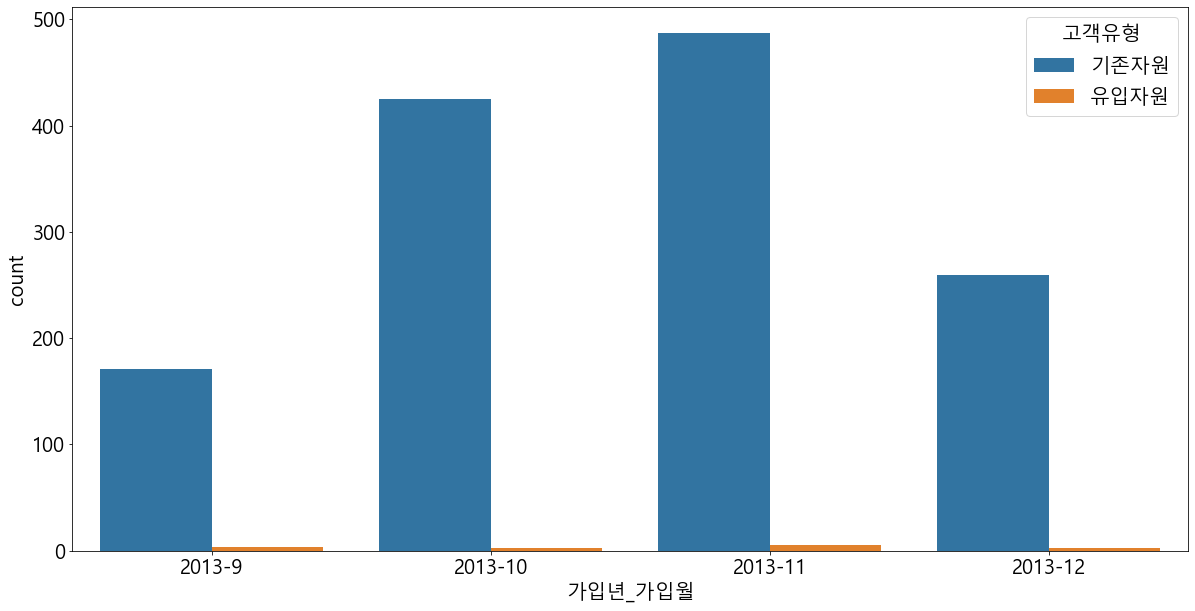

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(data = df3[df3["가입년"]==2013].sort_values(by=["가입년","가입월"]) , x = "가입년_가입월",hue = "고객유형")

<AxesSubplot:xlabel='가입년_가입월', ylabel='count'>

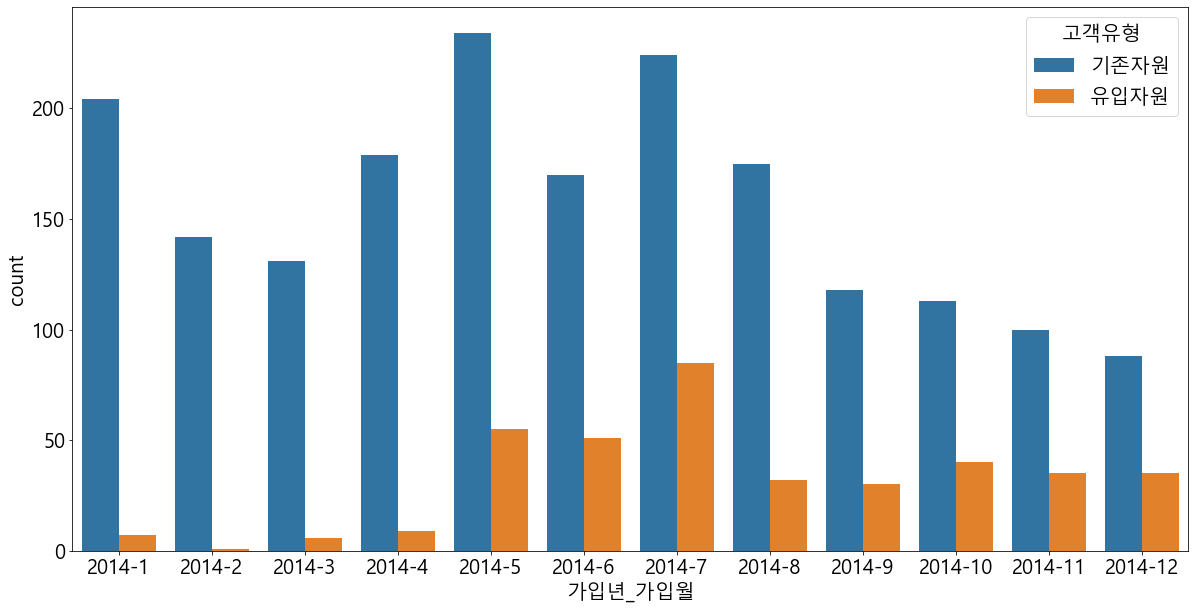

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(data = df3[df3["가입년"]==2014].sort_values(by=["가입년","가입월"]) , x = "가입년_가입월",hue = "고객유형")

<AxesSubplot:xlabel='가입년_가입월', ylabel='count'>

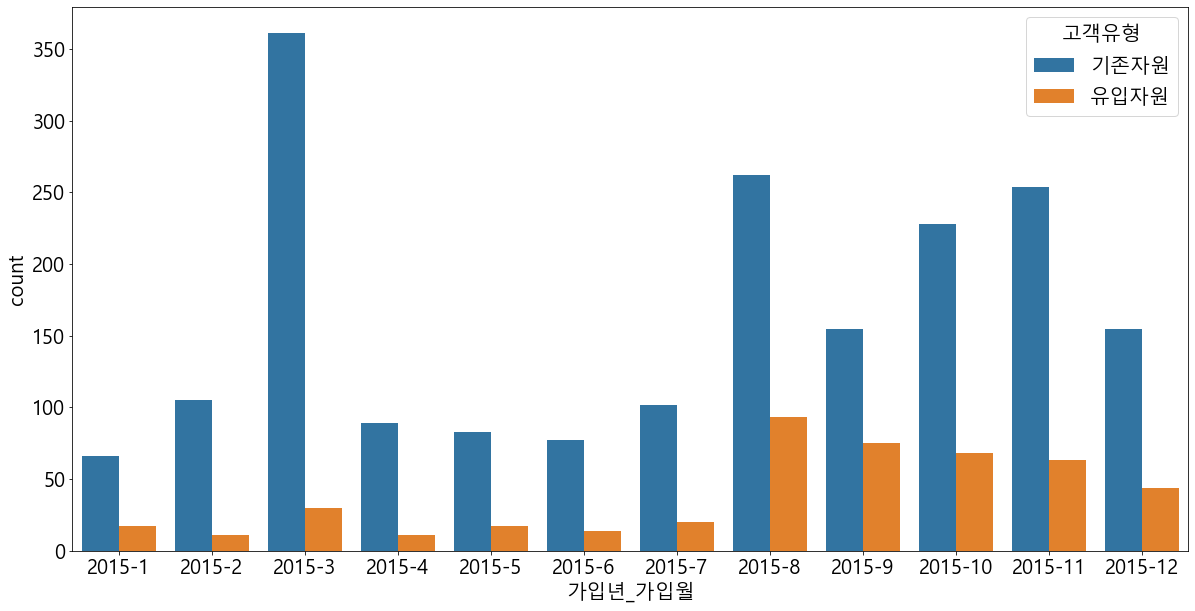

In [39]:
plt.figure(figsize=(20,10))
sns.countplot(data = df3[df3["가입년"]==2015].sort_values(by=["가입년","가입월"]) , x = "가입년_가입월",hue = "고객유형")

<AxesSubplot:xlabel='가입년_가입월', ylabel='count'>

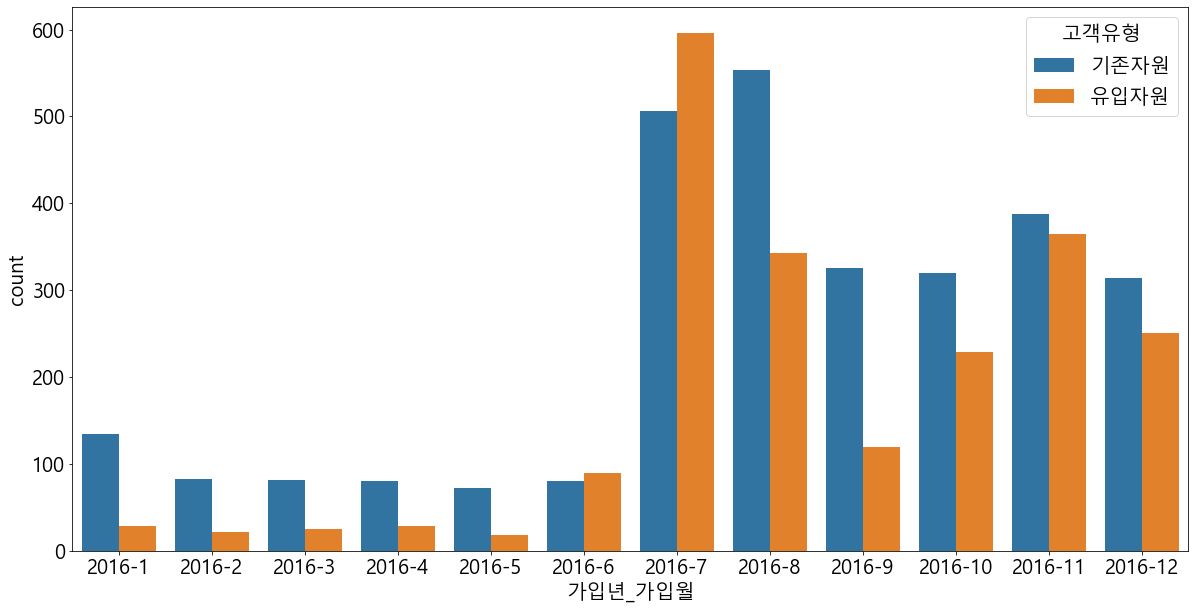

In [40]:
plt.figure(figsize=(20,10))
sns.countplot(data = df3[df3["가입년"]==2016].sort_values(by=["가입년","가입월"]) , x = "가입년_가입월",hue = "고객유형")

<AxesSubplot:xlabel='가입년_가입월', ylabel='count'>

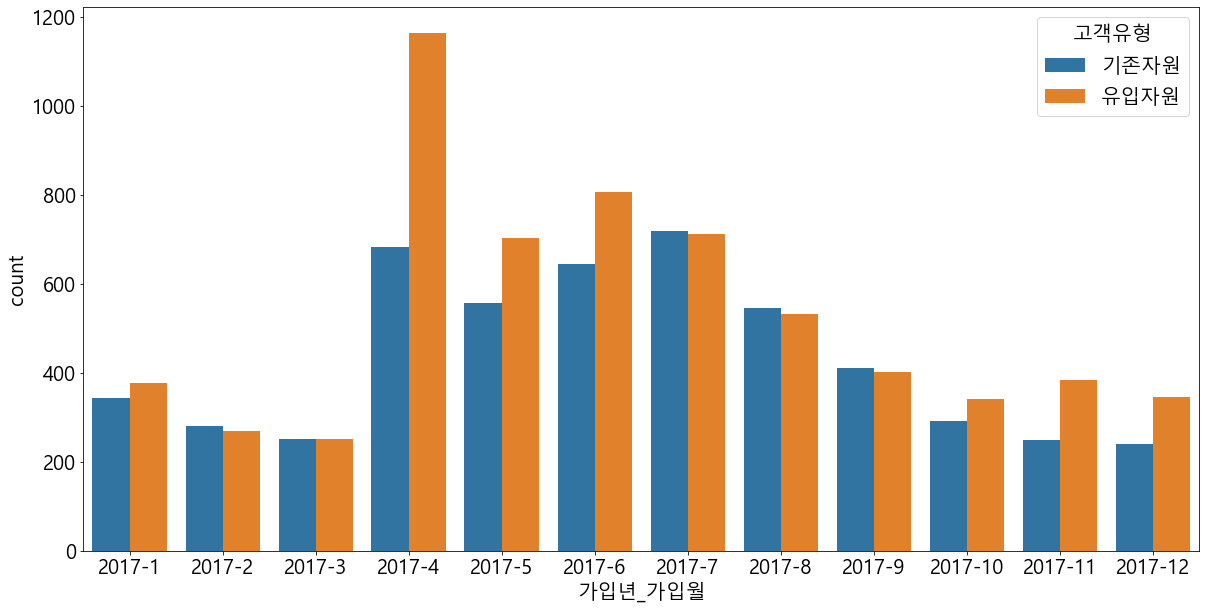

In [41]:
plt.figure(figsize=(20,10))
sns.countplot(data = df3[df3["가입년"]==2017].sort_values(by=["가입년","가입월"]) , x = "가입년_가입월",hue = "고객유형")

In [42]:
table_16_17 = temp_df2[(temp_df2["가입년"] == 2016 )| (temp_df2["가입년"] == 2017)] 

In [43]:
table_16_17

,아이디,가입일,정회원인증일,회원등급,멤버쉽,가입요일,가입년,가입월,가입주,가입년월,가입년주,인증소요시간,누적이용금액,최초 탑승일시,최근 탑승일시,...,성별,BIRTHDAY,ADDR,거주단지,세대수,입주개시일,단지 구분,단지 유형,영구혼합여부,17개도시,분기,연령,연령대,가입시간,고객유형
0,jjin85,2017-12-31,2018-01-02 15:09,정회원,GRDA02,1,2017,12,52,17/12,2017/52,41,640.0,2017-12-31 23:40:00,2017-12-31 23:40:00,...,여,1985,"서울특별시 송파구 백제고분로19길 30-9 (잠실동, 새서울하우스) 501호",대구금호천년나무5,1252.0,2017-01-10,LH,국민,순수 국민,서울특별시,4,33,30,21,유입자원
1,ataumuna,2017-12-31,2018-01-01 15:12,준회원,GRDA02,1,2017,12,52,17/12,2017/52,20,NaN,NaT,NaT,...,여,1986,서울특별시 성북구 인촌로7가길 56 (안암동2가) 103호,고려대 하나스퀘어,0.0,NaN,민간,민간,민간,서울특별시,4,32,30,19,NaN
2,dbsgml7788,2017-12-31,NaN,준회원,GRDA01,1,2017,12,52,17/12,2017/52,0,NaN,NaT,NaT,...,여,1993,경기도 고양시 덕양구 원흥동 669 삼송마을14단지아파트 14단지 1403 동106,고양삼송14,930.0,2014-09-15,LH,국민,순수 국민,경기도,4,25,20,17,유입자원
3,1004dyddlf,2017-12-31,2017-12-31 17:29,정회원,GRDA02,1,2017,12,52,17/12,2017/52,0,NaN,NaT,NaT,...,남,1990,"대구광역시 북구 내곡로 15 (사수동, 대구금호엘에이치천년나무8단지) 802동809호",대구금호천년나무8,1022.0,2016-05-24,LH,국민,순수 국민,대구광역시,4,28,20,17,유입자원
4,sss908,2017-12-31,2018-01-02 15:10,정회원,GRDA02,1,2017,12,52,17/12,2017/52,48,57140.0,2018-01-20 11:00:00,2018-01-20 11:00:00,...,남,1989,울산광역시 남구 야음동 564-4 우방유화아파트 101동 908호,고양삼송원흥11(행복주택),832.0,2016-12-28,LH,행복,행복,울산광역시,4,29,20,15,유입자원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18318,lifeon102,2016-01-01,2016-01-04 09:17,정회원,GRDA02,6,2016,1,53,16/01,2016/53,81,305190.0,2016-01-31 17:50:00,2017-12-22 21:40:00,...,남,1982,경기도 파주시 목동동 609동1401호,파주운정해솔6,1525.0,2014-05-31,LH,국민,순수 국민,경기도,1,35,30,00,유입자원
18319,choddok2,2016-01-01,2016-01-04 09:15,정회원,GRDA02,6,2016,1,53,16/01,2016/53,81,18301.0,2016-01-08 21:40:00,2016-04-02 22:00:00,...,남,1983,서울특별시 강남구 수서동 주공아파트 112-1501,서울수서,2565.0,1992-10-31,LH,영구,순수 영구,서울특별시,1,34,30,00,기존자원
18320,ctinrd1,2016-01-01,2016-01-04 09:16,정회원,GRDA02,6,2016,1,53,16/01,2016/53,81,NaN,NaT,NaT,...,여,1965,경기도 성남시 분당구 동판교로 91 410동 104호,성남백현4,1974.0,2013-09-12,LH,국민,순수 국민,경기도,1,52,50,00,유입자원
18321,xotkwk3,2016-01-01,2016-01-04 09:15,정회원,GRDA02,6,2016,1,53,16/01,2016/53,81,1268354.0,2016-01-13 11:00:00,2016-10-08 18:00:00,...,여,1969,서울특별시 강서구 가양3동 가양7단지아파트 105동 1410호,서울등촌9,1445.0,1994-11-01,LH,영구,순수 영구,서울특별시,1,48,40,00,기존자원


In [44]:
df3[df3["가입년"]==2015].sort_values(["17개도시","고객유형"])["17개도시"].unique()

array(['경기도', '경상남도', '대구광역시', '대전광역시', '부산광역시', '서울특별시', '인천광역시', '전라남도',
       '충청북도'], dtype=object)

In [45]:

plt.rc('font', size=15)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=15)  # 범례 폰트 크기
plt.rc('figure', titlesize=10) # figure title 폰트 크기

Text(0.5, 0, '10개 도시')

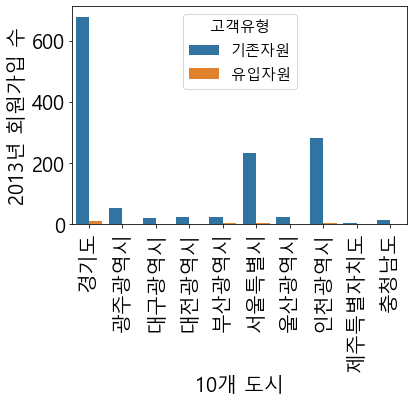

In [46]:
plt.xticks(rotation =90)
sns.countplot(data = df3[df3["가입년"]==2013].sort_values(["17개도시","고객유형"]), x ="17개도시" ,hue = "고객유형")
plt.ylabel("2013년 회원가입 수")
plt.xlabel("10개 도시")

Text(0.5, 0, '10개 도시')

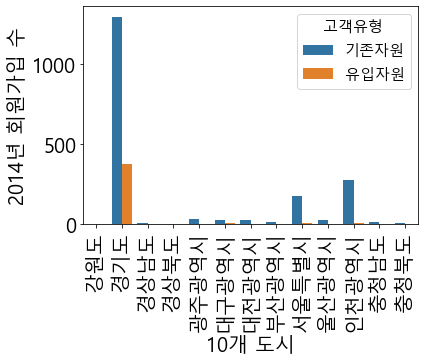

In [47]:
plt.xticks(rotation =90)
sns.countplot(data = df3[df3["가입년"]==2014].sort_values(["17개도시","고객유형"]), x ="17개도시" ,hue = "고객유형")
plt.ylabel("2014년 회원가입 수")
plt.xlabel("10개 도시")

Text(0.5, 0, '10개 도시')

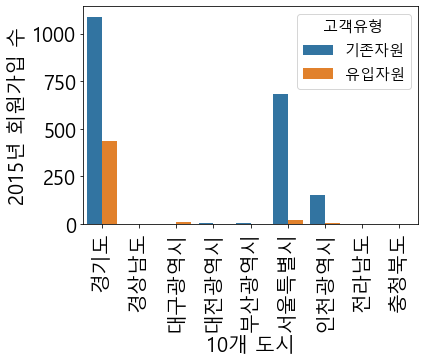

In [48]:
plt.xticks(rotation =90)
sns.countplot(data = df3[df3["가입년"]==2015].sort_values(["17개도시","고객유형"]), x ="17개도시" ,hue = "고객유형")
plt.ylabel("2015년 회원가입 수")
plt.xlabel("10개 도시")

In [49]:

plt.rc('font', size=15)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=15)  # 범례 폰트 크기
plt.rc('figure', titlesize=10) # figure title 폰트 크기

Text(0, 0.5, '2016년 회원가입 수')

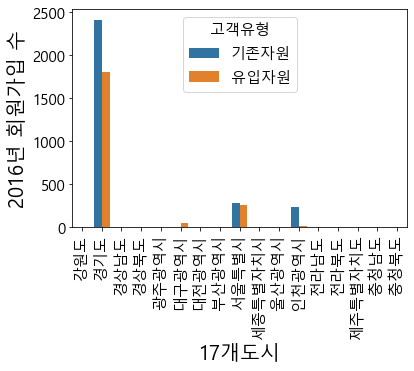

In [50]:
plt.xticks(rotation =90)
sns.countplot(data = table_16_17[table_16_17["가입년"]==2016].sort_values("17개도시"), x ="17개도시" ,hue = "고객유형")
plt.ylabel("2016년 회원가입 수")

In [51]:

plt.rc('font', size=15)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=15)  # 범례 폰트 크기
plt.rc('figure', titlesize=10) # figure title 폰트 크기

Text(0, 0.5, '2017년 회원가입 수')

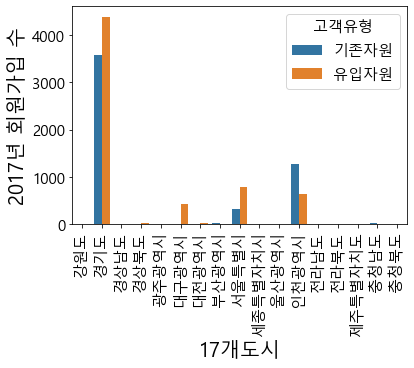

In [52]:
plt.xticks(rotation =90)
sns.countplot(data = table_16_17[table_16_17["가입년"]==2017].sort_values(by=["17개도시"]) , x ="17개도시" ,hue = "고객유형")
plt.ylabel("2017년 회원가입 수")

# 성별은 의미없음.

Text(0, 0.5, '2014년 회원가입 수')

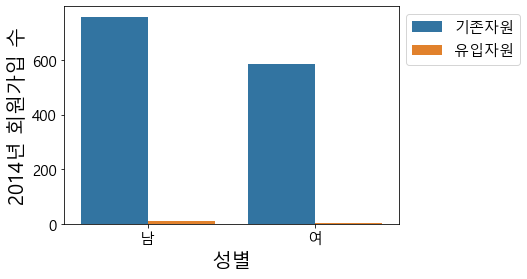

In [53]:
plt.xticks(rotation =0)
sns.countplot(data = df3[df3["가입년"] == 2013].sort_values(["성별","고객유형"]), x ="성별" ,hue = "고객유형")
plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("2014년 회원가입 수")

Text(0, 0.5, '2014년 회원가입 수')

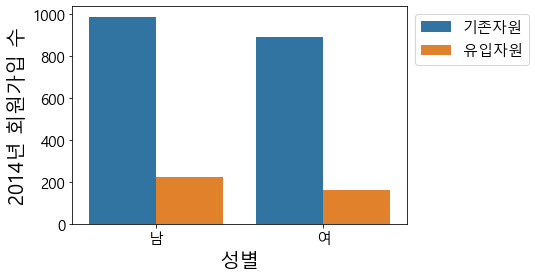

In [54]:
plt.xticks(rotation =0)
sns.countplot(data = df3[df3["가입년"] == 2014].sort_values(["성별","고객유형"]), x ="성별" ,hue = "고객유형")
plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("2014년 회원가입 수")

Text(0, 0.5, '2015년 회원가입 수')

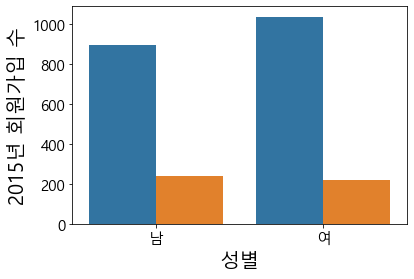

In [55]:
plt.xticks(rotation =0)
sns.countplot(data = df3[df3["가입년"] == 2015].sort_values(["성별","고객유형"]), x ="성별" ,hue = "고객유형")
plt.legend([],[], frameon=False)
plt.ylabel("2015년 회원가입 수")

Text(0, 0.5, '2016년 회원가입 수')

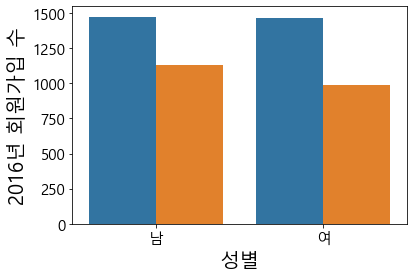

In [56]:
plt.xticks(rotation =0)
sns.countplot(data = table_16_17[table_16_17["가입년"] == 2016].sort_values(["성별","고객유형"]), x ="성별" ,hue = "고객유형")
plt.legend([],[], frameon=False)
plt.ylabel("2016년 회원가입 수")

Text(0, 0.5, '2017년 회원가입 수')

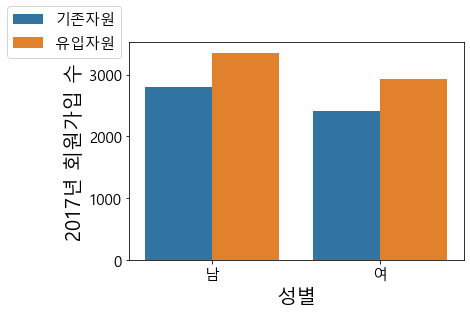

In [57]:
plt.xticks(rotation =0)
sns.countplot(data = table_16_17[table_16_17["가입년"] == 2017].sort_values(["성별","고객유형"]), x ="성별" ,hue = "고객유형")
plt.legend(bbox_to_anchor = (0,1.2))
plt.ylabel("2017년 회원가입 수")

In [58]:
# 2016년 ~ 2017년 증가 추세를 보니, 4,5,6월 유입자원의 가입자 수가 엄청나게 증가

Text(0, 0.5, '2015년 회원가입 수')

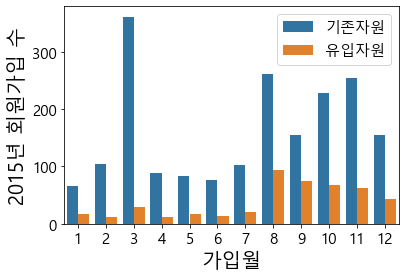

In [59]:
plt.xticks(rotation =0)
sns.countplot(data = df3[df3["가입년"] == 2015].sort_values("고객유형"), x ="가입월" ,hue = "고객유형")
plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("2015년 회원가입 수")

Text(0, 0.5, '2016년 회원가입 수')

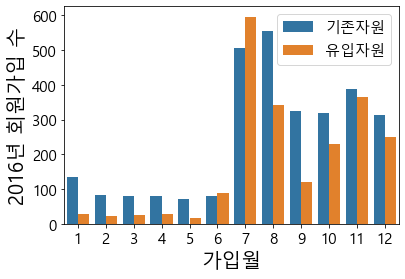

In [60]:
plt.xticks(rotation =0)
sns.countplot(data = df3[df3["가입년"] == 2016], x ="가입월" ,hue = "고객유형")
plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("2016년 회원가입 수")

Text(0, 0.5, '2017년 회원가입 수')

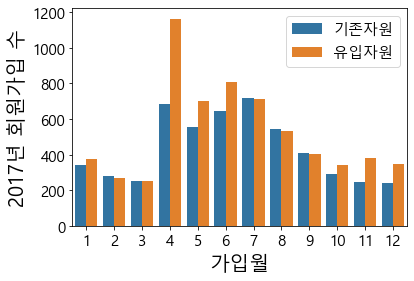

In [61]:
plt.xticks(rotation =0)
sns.countplot(data = df3[df3["가입년"] == 2017].sort_values("고객유형"), x ="가입월" ,hue = "고객유형")
plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("2017년 회원가입 수")

Text(0, 0.5, '2015년 회원가입 수')

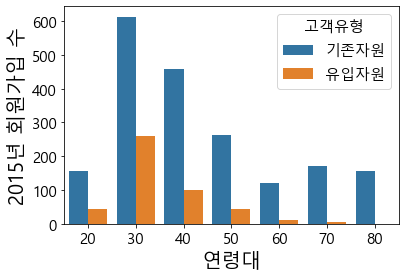

In [62]:
plt.xticks(rotation =0)
sns.countplot(data = df3[df3["가입년"] == 2015].sort_values("고객유형"), x ="연령대" ,hue = "고객유형")
# plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("2015년 회원가입 수")

Text(0, 0.5, '2016년 회원가입 수')

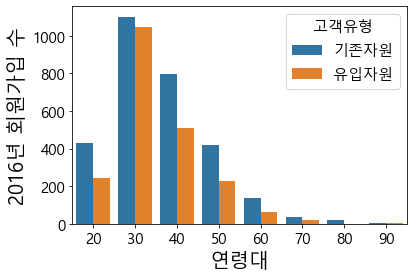

In [63]:
plt.xticks(rotation =0)
sns.countplot(data = temp_df2[temp_df2["가입년"] == 2016].sort_values("고객유형"), x ="연령대" ,hue = "고객유형")
# plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("2016년 회원가입 수")

Text(0, 0.5, '2017년 회원가입 수')

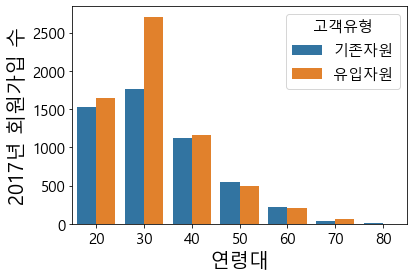

In [64]:
plt.xticks(rotation =0)
sns.countplot(data = df3[df3["가입년"] == 2017].sort_values("고객유형"), x ="연령대" ,hue = "고객유형")
# plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("2017년 회원가입 수")

In [102]:
df3["가입요일toEng"]=df3["가입요일"].replace([1,2,3,4,5,6,7],["Sunday","Monday","Tuesday","Wednesday","Thursday",
                                     "Friday","Saturday"])

C:\Users\user\AppData\Local\Temp/ipykernel_5272/1420587431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["가입요일toEng"]=df3["가입요일"].replace([1,2,3,4,5,6,7],["Sunday","Monday","Tuesday","Wednesday","Thursday",


Text(0, 0.5, '총 회원가입 수')

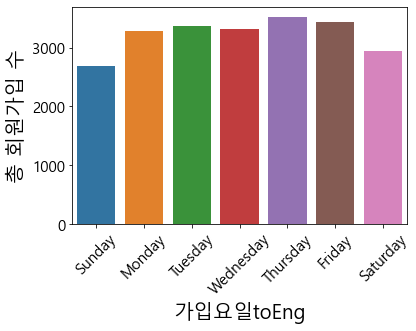

In [113]:
plt.xticks(rotation =45)
sns.countplot(data =df3.sort_values("가입요일"), x = "가입요일toEng")
# plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("총 회원가입 수")


<AxesSubplot:xlabel='가입요일', ylabel='count'>

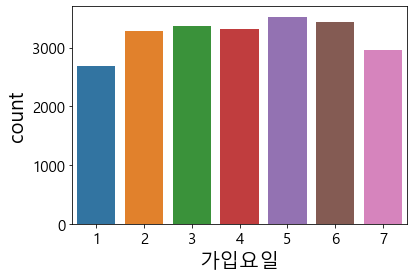

In [105]:
sns.countplot(data =df3, x = "가입요일")
# plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("총 회원가입 수")
plt.xlabel("Sunday","Monday","Tuesday","Wednesday","Thursday",
                                     "Friday","Saturday"")

In [ ]:
plt.xticks(rotation =0)
sns.countplot(data = df3[].sort_values("고객유형"), x ="연령대" ,hue = "고객유형")
# plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("2017년 회원가입 수")

Text(0, 0.5, '2016년 회원가입 수')

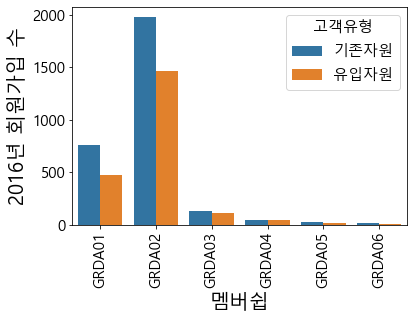

In [65]:
plt.xticks(rotation =90)
sns.countplot(data = table_16_17[table_16_17["가입년"] == 2016].sort_values(["멤버쉽","고객유형"]), x ="멤버쉽" ,hue = "고객유형")
# plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("2016년 회원가입 수")

Text(0, 0.5, '2017년 회원가입 수')

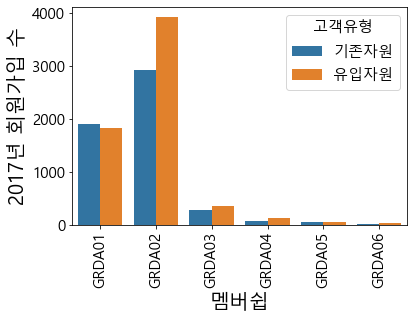

In [66]:
plt.xticks(rotation =90)
sns.countplot(data = table_16_17[table_16_17["가입년"] == 2017].sort_values(["멤버쉽","고객유형"]), x ="멤버쉽" ,hue = "고객유형")
# plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("2017년 회원가입 수")

# Grade 별 년도/월마다 회원가입 수

Text(0, 0.5, '회원가입 수')

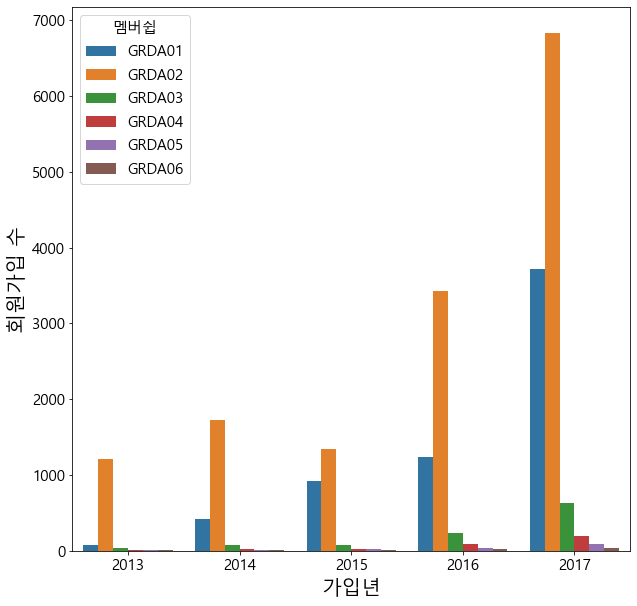

In [67]:
plt.figure(figsize=(10,10))
sns.countplot(data = df3.sort_values(by=["가입년","멤버쉽"]) , x ="가입년",hue = "멤버쉽")
# plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("회원가입 수")

<AxesSubplot:xlabel='가입년_가입월', ylabel='count'>

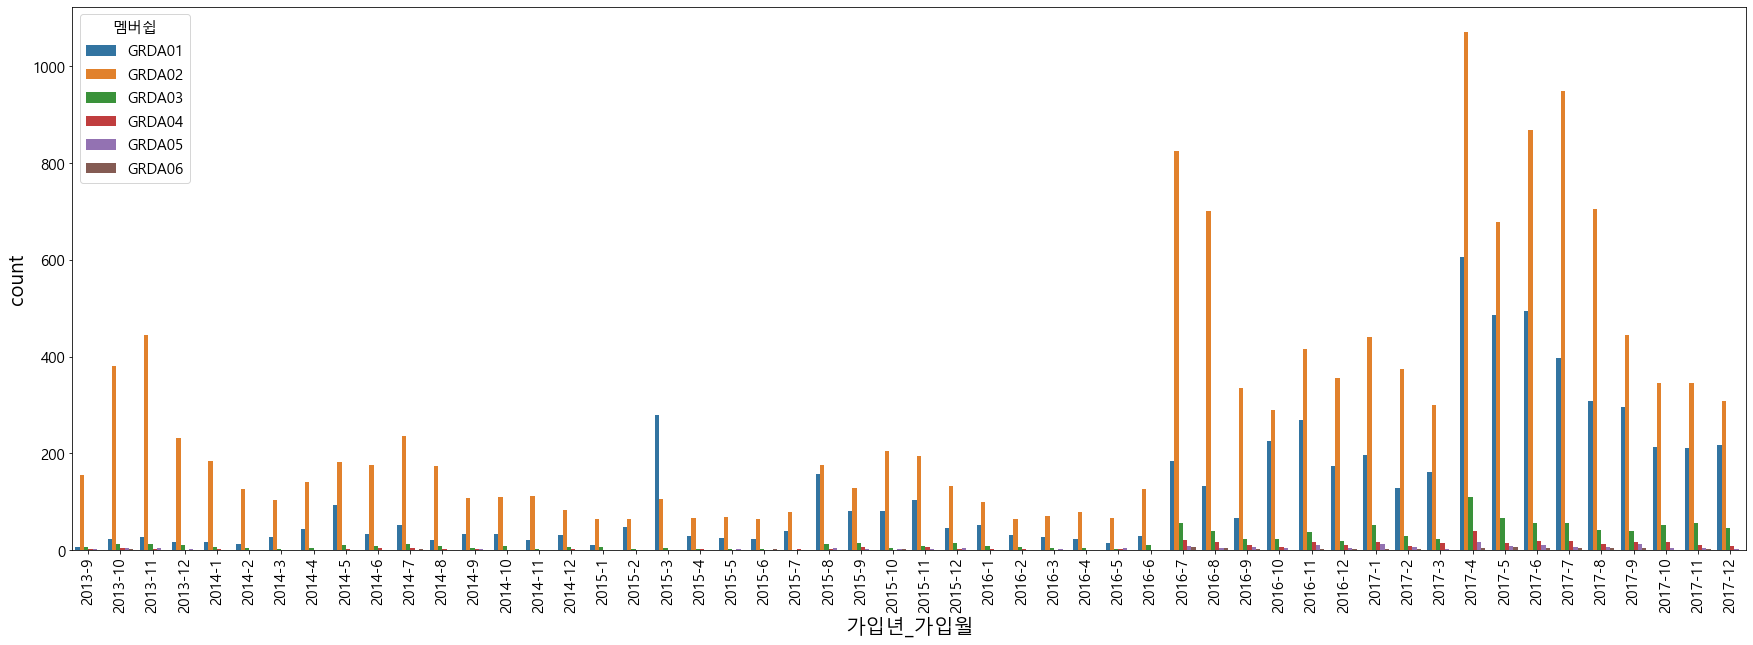

In [68]:
plt.figure(figsize=(30,10))
plt.xticks(rotation =90)
sns.countplot(data = df3.sort_values(by=["가입년","가입월","멤버쉽"]) , x ="가입년_가입월",hue = "멤버쉽" )

<AxesSubplot:xlabel='가입년_가입월', ylabel='count'>

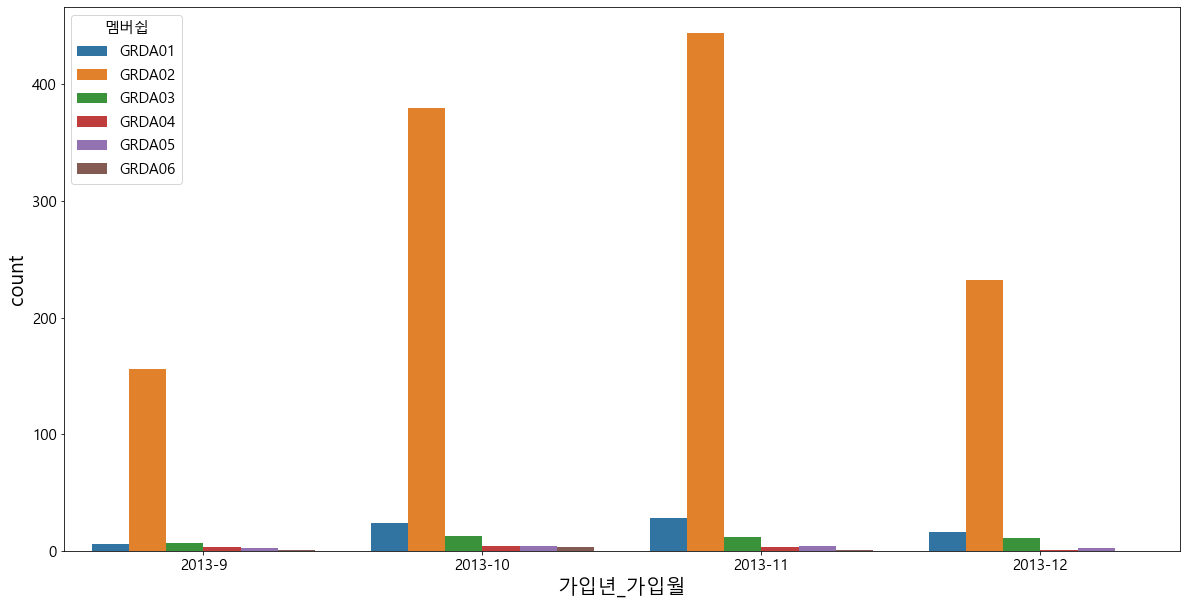

In [69]:
plt.figure(figsize=(20,10))
sns.countplot(data = df3[df3["가입년"]==2013].sort_values(by=["가입년","가입월",'멤버쉽']) , x = "가입년_가입월",hue = "멤버쉽")

<AxesSubplot:xlabel='가입년_가입월', ylabel='count'>

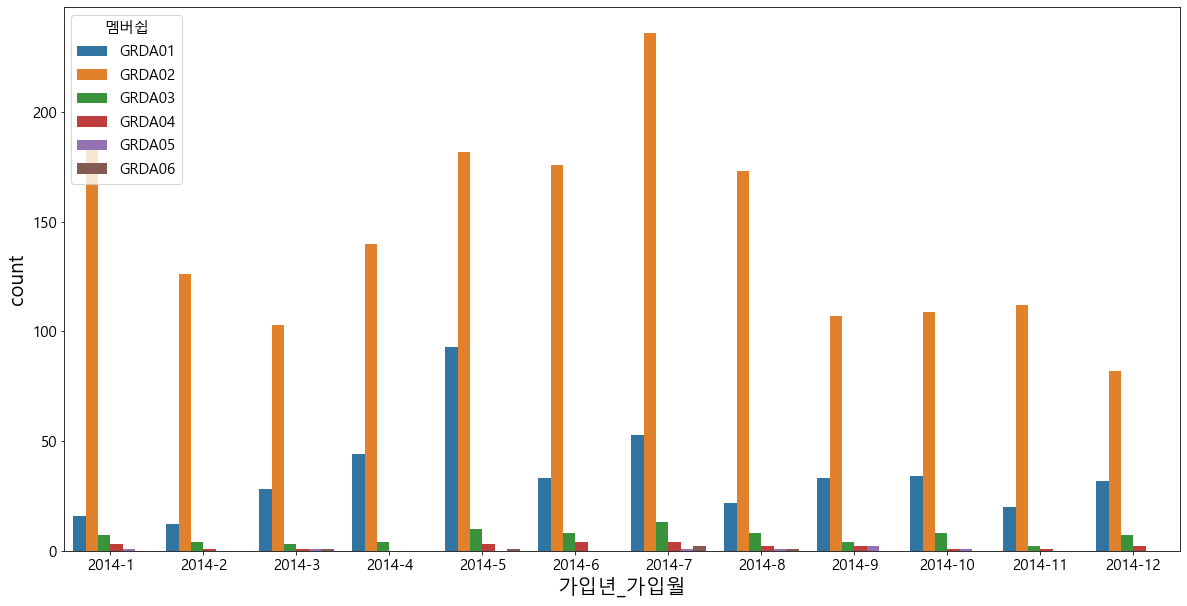

In [70]:
plt.figure(figsize=(20,10))
sns.countplot(data = df3[df3["가입년"]==2014].sort_values(by=["가입년","가입월",'멤버쉽']) , x = "가입년_가입월",hue = "멤버쉽")

<AxesSubplot:xlabel='가입년_가입월', ylabel='count'>

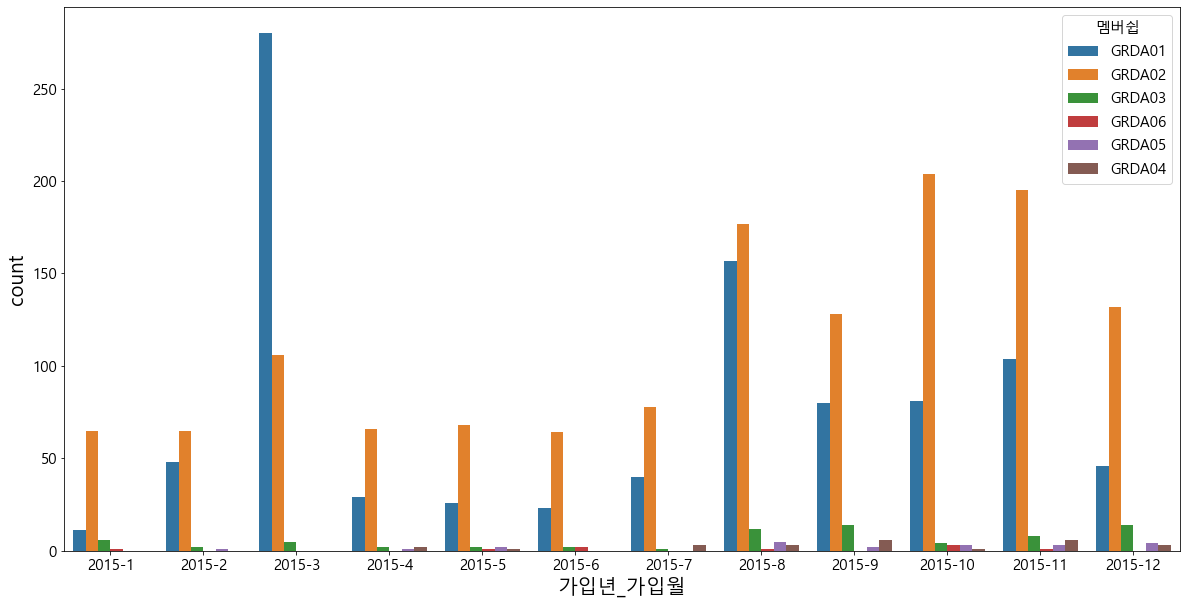

In [71]:
plt.figure(figsize=(20,10))
sns.countplot(data = df3[df3["가입년"]==2015].sort_values(by=["가입년","가입월",'멤버쉽']) , x = "가입년_가입월",hue = "멤버쉽")

<AxesSubplot:xlabel='가입년_가입월', ylabel='count'>

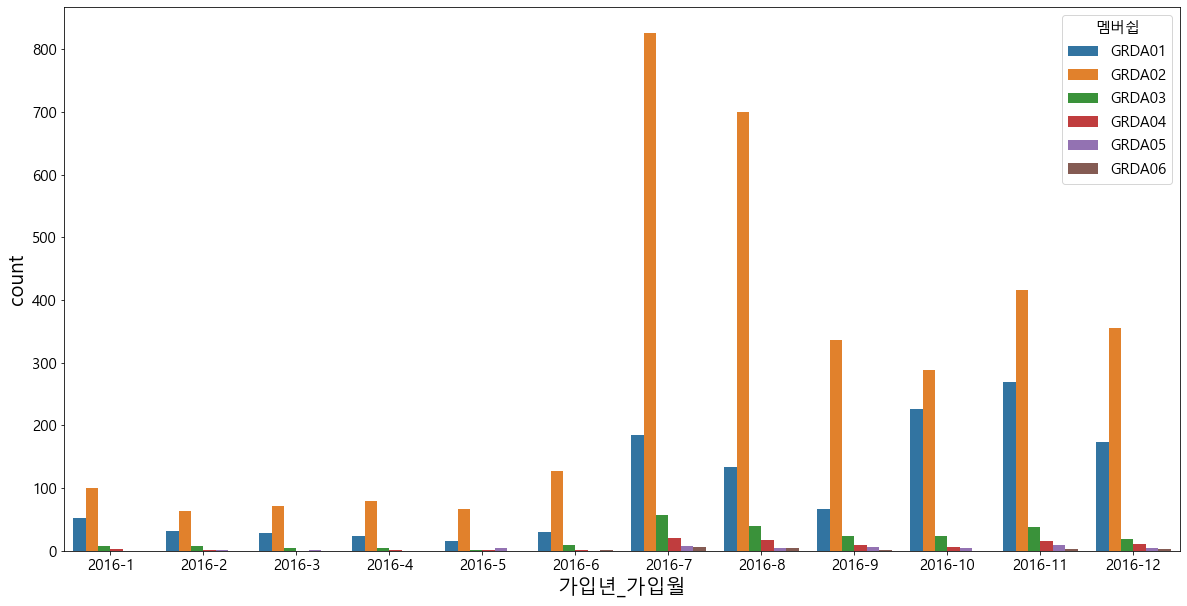

In [72]:
plt.figure(figsize=(20,10))
sns.countplot(data = df3[df3["가입년"]==2016].sort_values(by=["가입년","가입월",'멤버쉽']) , x = "가입년_가입월",hue = "멤버쉽")

# 2017년 월별 가입자 grade수 

<AxesSubplot:xlabel='가입년_가입월', ylabel='count'>

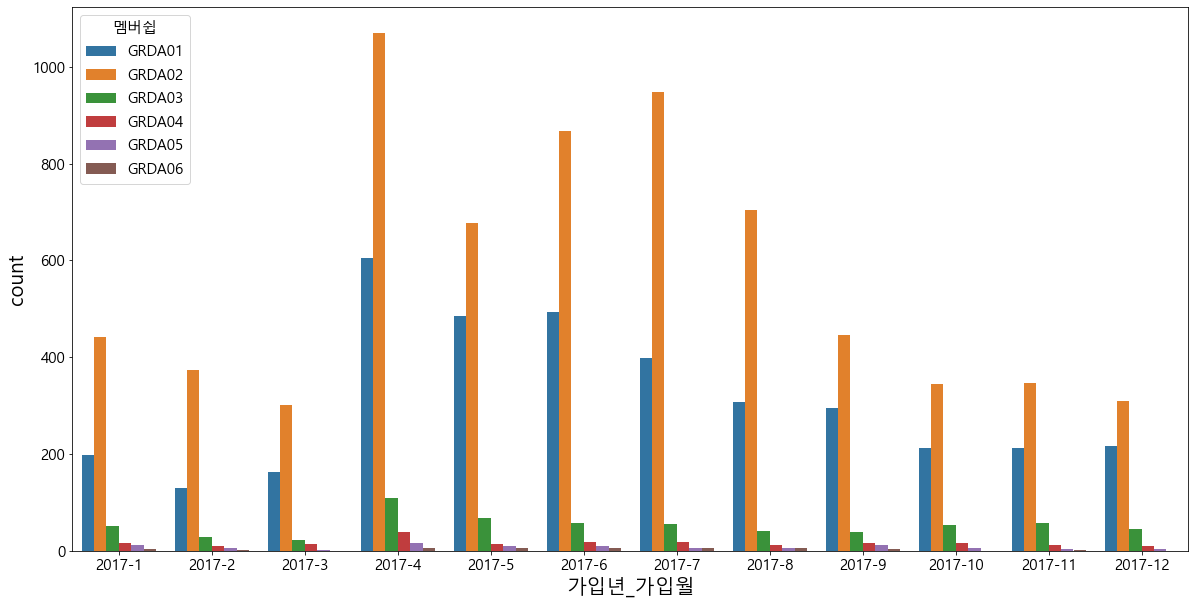

In [73]:
plt.figure(figsize=(20,10))
sns.countplot(data = df3[df3["가입년"]==2017].sort_values(by=["가입년","가입월",'멤버쉽']) , x = "가입년_가입월",hue = "멤버쉽")

<AxesSubplot:xlabel='멤버쉽', ylabel='누적이용금액'>

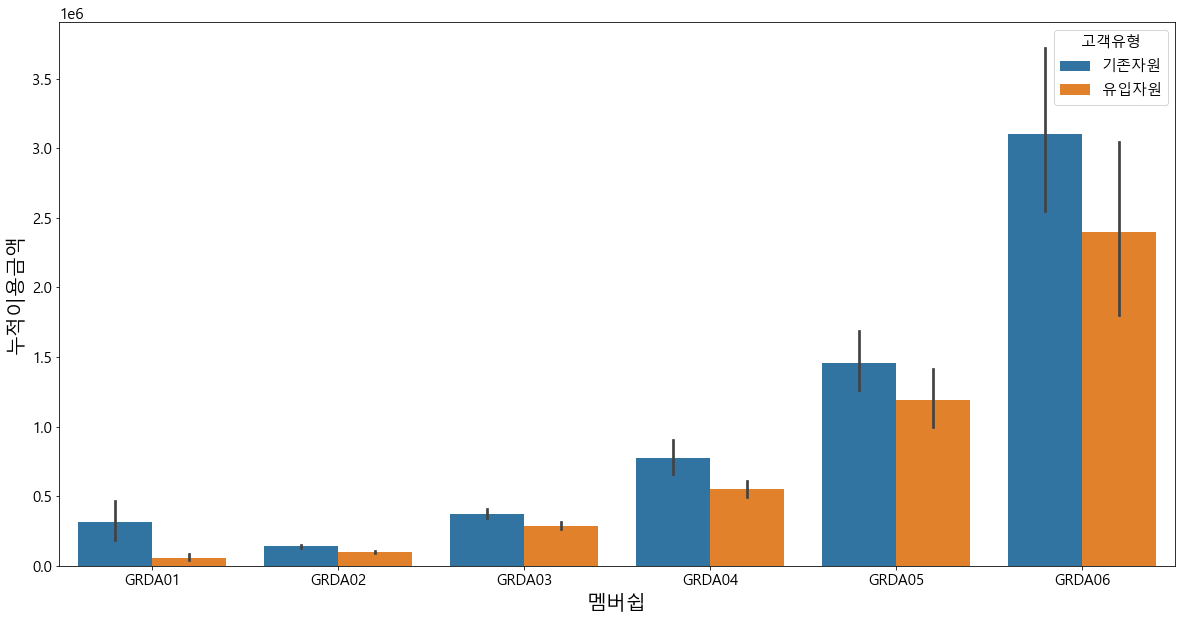

In [74]:
plt.figure(figsize=(20,10))
sns.barplot(data = df3.sort_values(by=['멤버쉽']) , x = "멤버쉽", y = "누적이용금액",hue= "고객유형")

<AxesSubplot:xlabel='가입년', ylabel='누적이용금액'>

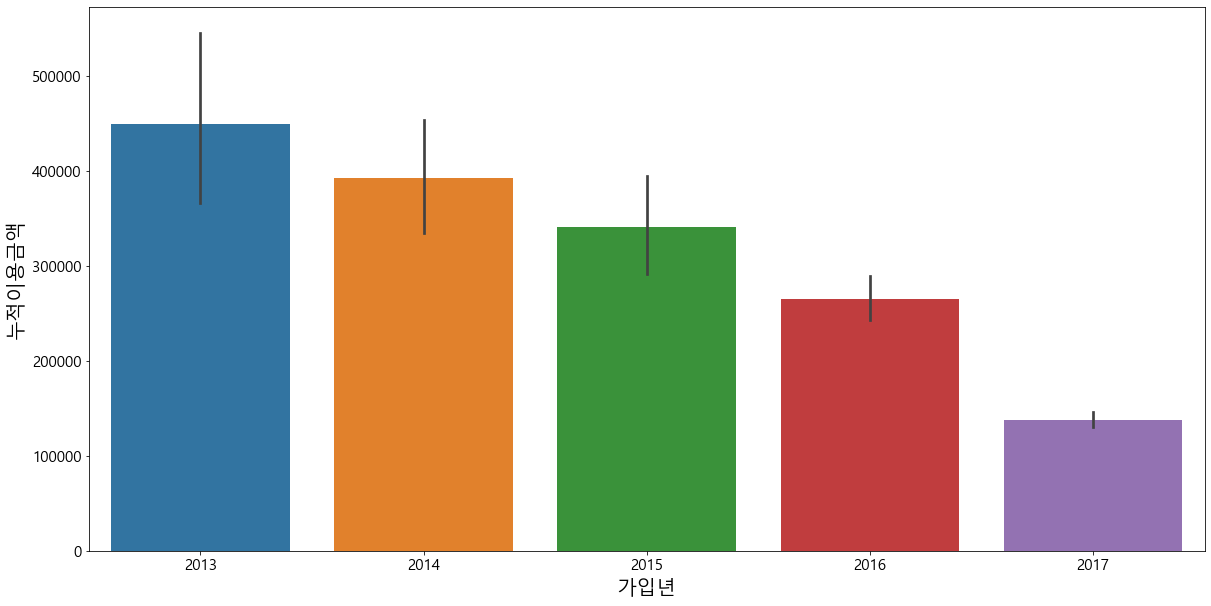

In [75]:
plt.figure(figsize=(20,10))
sns.barplot(data = df3 , x = "가입년", y = "누적이용금액")

- 2. 지역별로 증가 추이는 어떠한가?

- 3.연령별 증가 추이는 어떠한가?

In [76]:
# pd.crosstab(index=[temp_df2["고객유형"],temp_df2["연령대"]],columns=temp_df2["가입년"])

<AxesSubplot:xlabel='가입년_가입월', ylabel='count'>

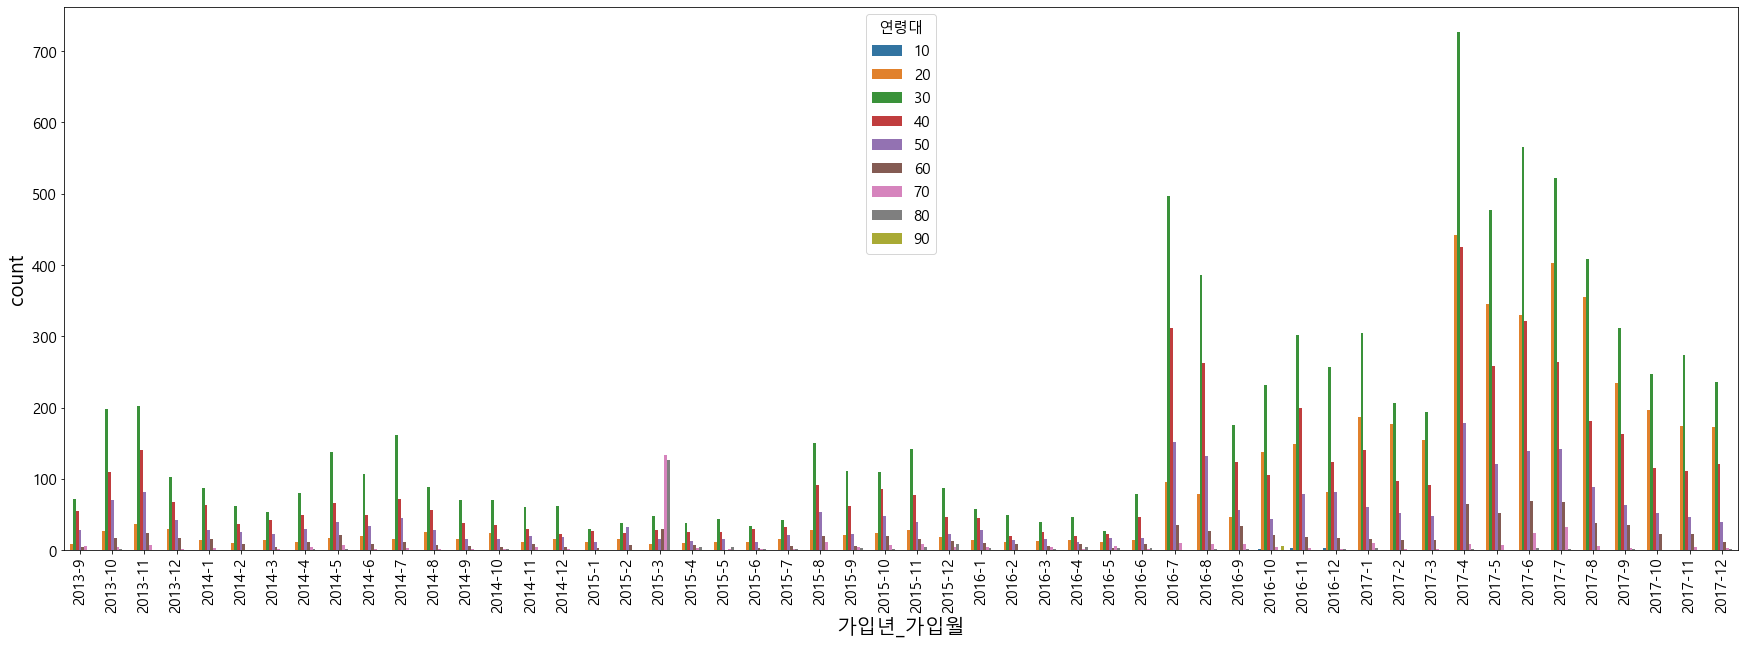

In [77]:
plt.figure(figsize=(30,10))
plt.xticks(rotation =90)
sns.countplot(data = df3.sort_values(by=['가입년',"가입월"]) , x = "가입년_가입월",hue="연령대")

- 4.성별에 따른 증가 추이는 어떠한가?

<AxesSubplot:xlabel='가입년_가입월', ylabel='count'>

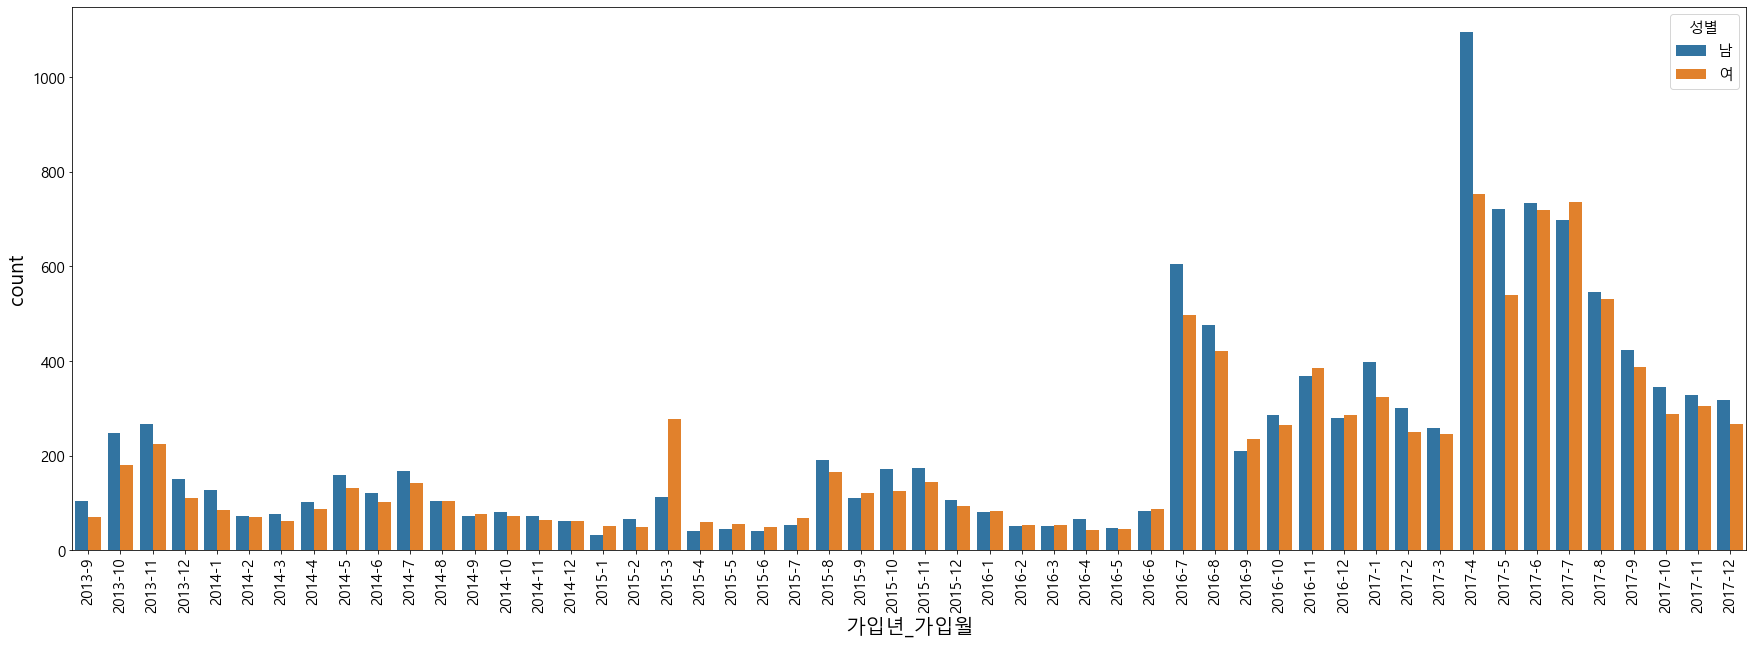

In [78]:
plt.figure(figsize=(30,10))
plt.xticks(rotation =90)
sns.countplot(data = df3.sort_values(by=['가입년',"가입월"]) , x = "가입년_가입월",hue="성별")

- Grade별 이용자 수

In [79]:
df3["가입년"].value_counts()

2017    11500
2016     5052
2015     2400
2014     2264
2013     1357
Name: 가입년, dtype: int64

Text(0, 0.5, '2016년 회원가입 수')

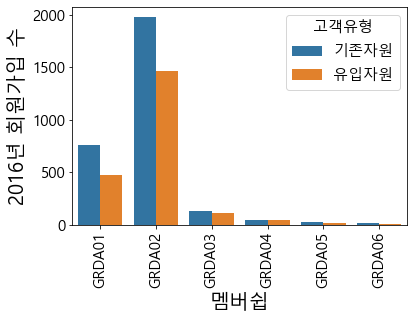

In [80]:
plt.xticks(rotation =90)
sns.countplot(data = table_16_17[table_16_17["가입년"] == 2016].sort_values(["멤버쉽","고객유형"]), x ="멤버쉽" ,hue = "고객유형")
# plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("2016년 회원가입 수")

Text(0, 0.5, '총 회원수')

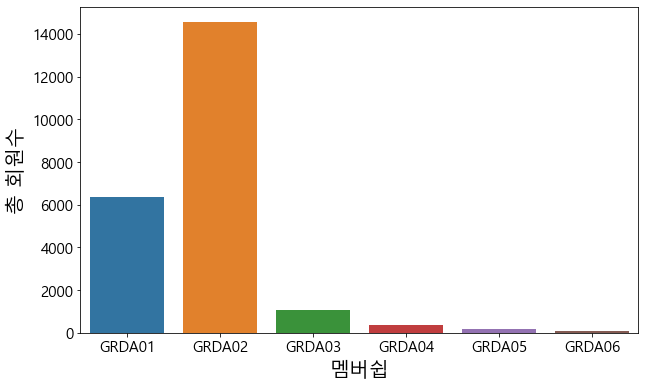

In [81]:
plt.figure(figsize=(10,6))

sns.countplot(data = df3.sort_values(by="멤버쉽") , x = "멤버쉽")
# plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("총 회원수")

- Grade별 누적이용금액 총합

Text(0, 0.5, '총 누적금액')

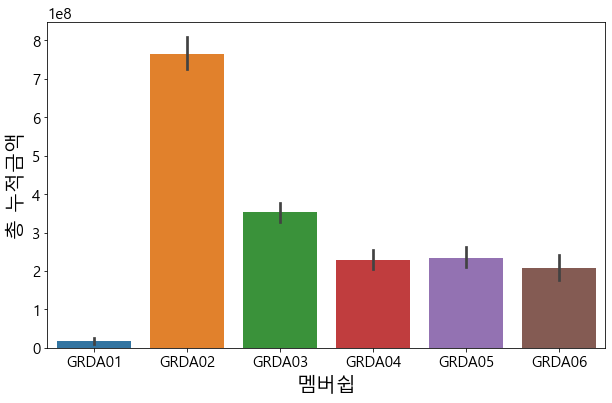

In [82]:
plt.figure(figsize=(10,6))
sns.barplot(data = df3.sort_values(by="멤버쉽") , x = "멤버쉽",y="누적이용금액",estimator=np.sum)
# plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("총 누적금액")

Text(0, 0.5, '평균 누적금액')

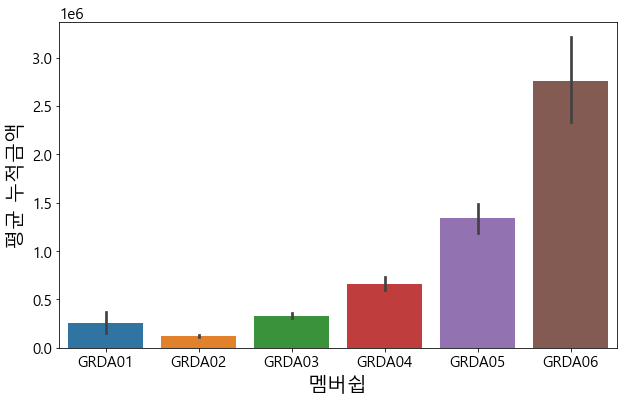

In [83]:
plt.figure(figsize=(10,6))

sns.barplot(data = df3.sort_values(by=['멤버쉽']) , x = "멤버쉽",y="누적이용금액",estimator=np.mean)
# plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("평균 누적금액")

- 연도별 Grade 이용금액(총합)

Text(0, 0.5, '평균 누적금액')

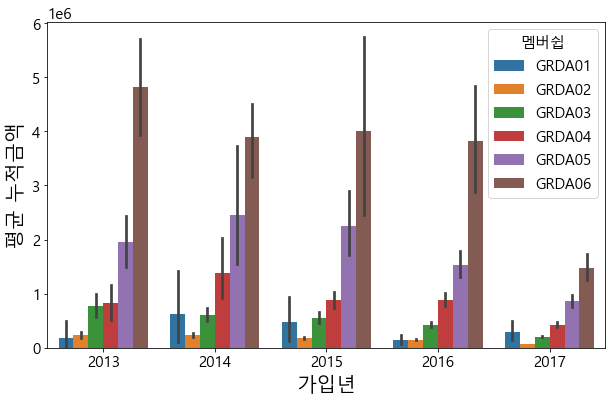

In [84]:
plt.figure(figsize=(10,6))
sns.barplot(data = df3.sort_values(by=['멤버쉽']) , x = "가입년",y="누적이용금액",estimator=np.mean,hue="멤버쉽")
# plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("평균 누적금액")

<AxesSubplot:xlabel='가입년', ylabel='count'>

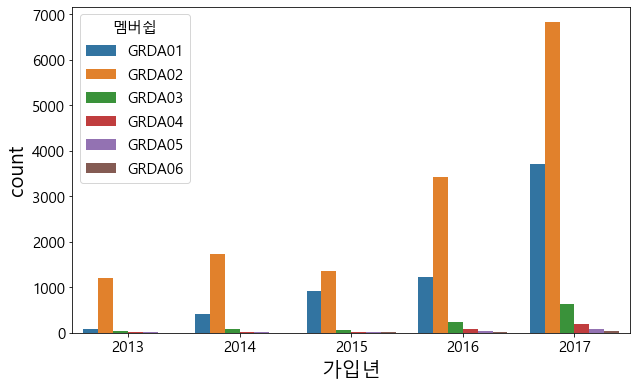

In [85]:
plt.figure(figsize=(10,6))
sns.countplot(data = df3.sort_values(by=['멤버쉽']) , x = "가입년",hue="멤버쉽")

# Grade별 평균 누적이용금액은 grade가 높을 수록 남성보다 여성이 높음.

In [86]:
p1 = sns.color_palette('pastel')

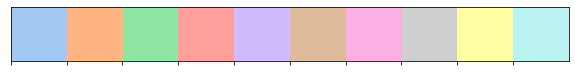

In [87]:
sns.palplot(p1)

Text(0, 0.5, '평균 누적금액')

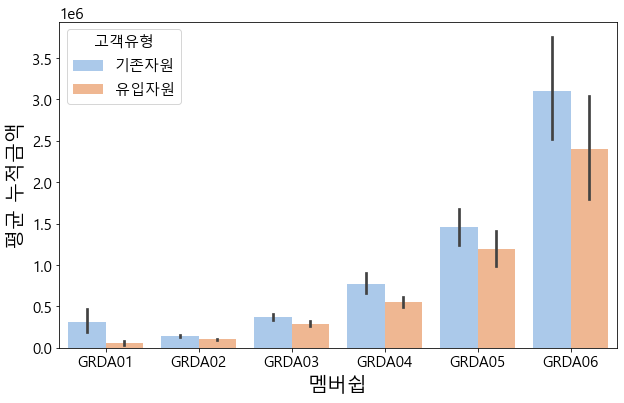

In [88]:
plt.figure(figsize=(10,6))
sns.barplot(data = df3.sort_values(by=['멤버쉽']) , x = "멤버쉽",y="누적이용금액",estimator=np.mean ,hue="고객유형",palette=p1)
# plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("평균 누적금액")

Text(0, 0.5, '평균 누적금액')

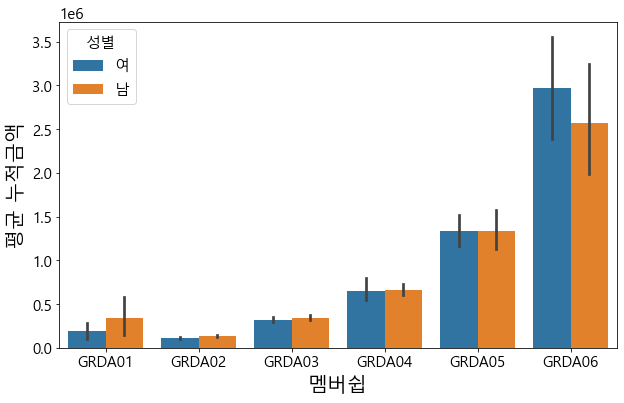

In [89]:
plt.figure(figsize=(10,6))
sns.barplot(data = df3.sort_values(by=['멤버쉽']) , x = "멤버쉽",y="누적이용금액",estimator=np.mean ,hue="성별")
# plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("평균 누적금액")

Text(0, 0.5, '총 누적금액')

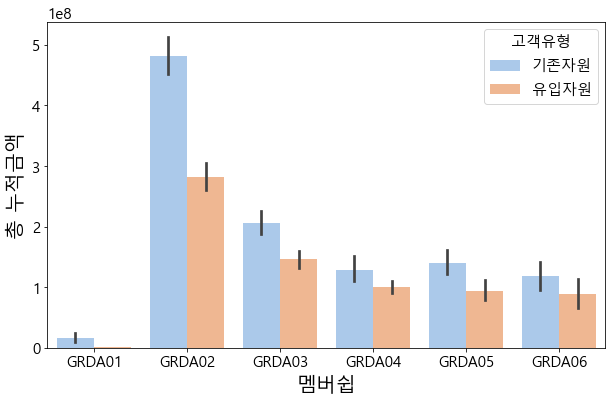

In [90]:
plt.figure(figsize=(10,6))
sns.barplot(data = df3.sort_values(by=['멤버쉽']) , x = "멤버쉽",y="누적이용금액",estimator=np.sum ,hue="고객유형",palette=p1)
# plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("총 누적금액")

Text(0, 0.5, '총 누적금액')

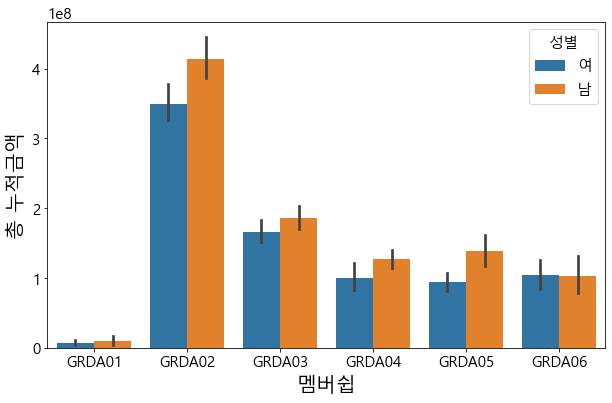

In [91]:
plt.figure(figsize=(10,6))
sns.barplot(data = df3.sort_values(by=['멤버쉽']) , x = "멤버쉽",y="누적이용금액",estimator=np.sum ,hue="성별")
# plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("총 누적금액")

Text(0, 0.5, '총 누적금액')

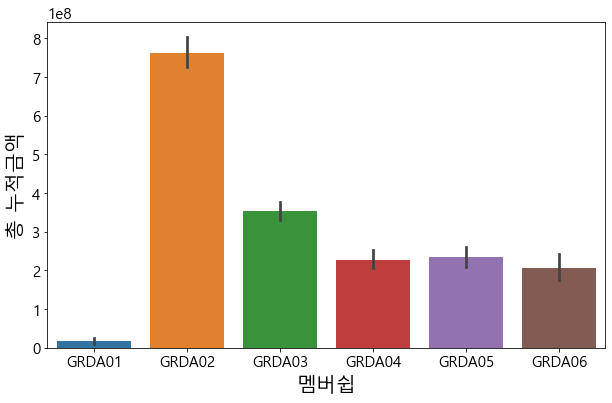

In [92]:
plt.figure(figsize=(10,6))
sns.barplot(data = df3.sort_values(by=['멤버쉽']) , x = "멤버쉽",y="누적이용금액",estimator=np.sum)
# plt.legend(bbox_to_anchor = (1,1))
plt.ylabel("총 누적금액")

# Grade별 n년에 가입한 수

<AxesSubplot:xlabel='가입년', ylabel='count'>

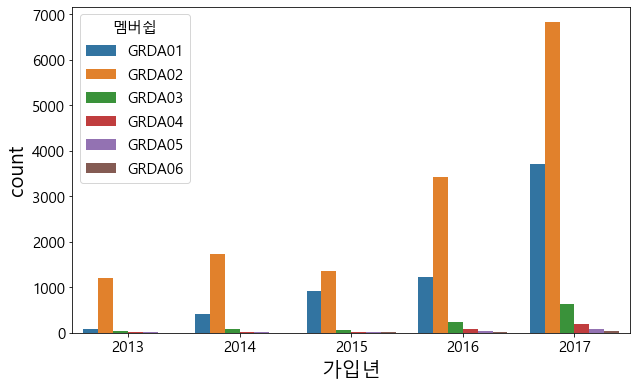

In [93]:
plt.figure(figsize=(10,6))
sns.countplot(data = df3.sort_values(by=['멤버쉽']), x = "가입년",hue="멤버쉽")

# Grade별 성별에 따른 n년에 가입한 수 

<AxesSubplot:xlabel='멤버쉽', ylabel='count'>

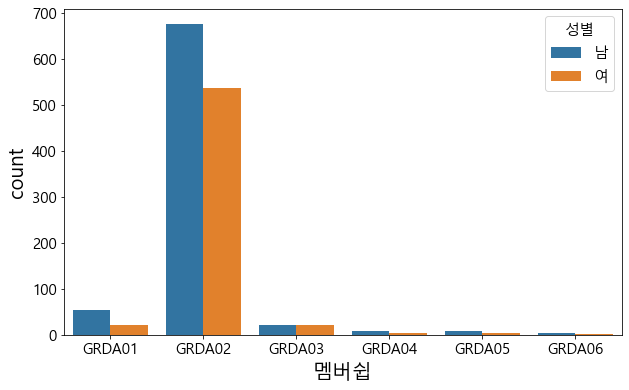

In [94]:
plt.figure(figsize=(10,6))
sns.countplot(data = df3[df3["가입년"] == 2013].sort_values(by=['멤버쉽']), x = "멤버쉽", hue="성별")

<AxesSubplot:xlabel='멤버쉽', ylabel='count'>

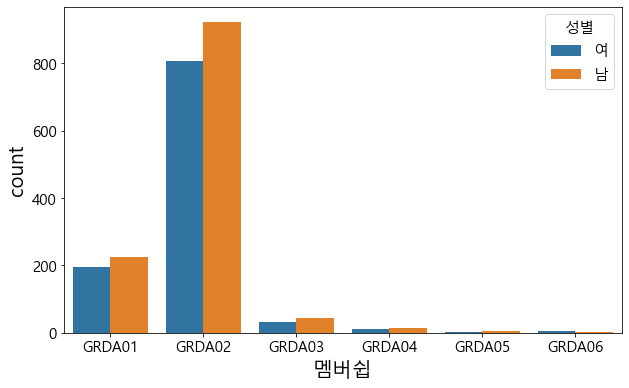

In [95]:
plt.figure(figsize=(10,6))
sns.countplot(data = df3[df3["가입년"] == 2014].sort_values(by=['멤버쉽']) , x = "멤버쉽",hue="성별")

<AxesSubplot:xlabel='멤버쉽', ylabel='count'>

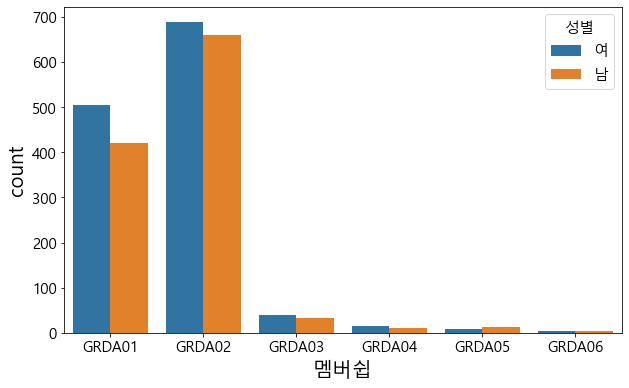

In [96]:
plt.figure(figsize=(10,6))
sns.countplot(data = df3[df3["가입년"] == 2015].sort_values(by=['멤버쉽']) , x = "멤버쉽",hue="성별")

<AxesSubplot:xlabel='멤버쉽', ylabel='count'>

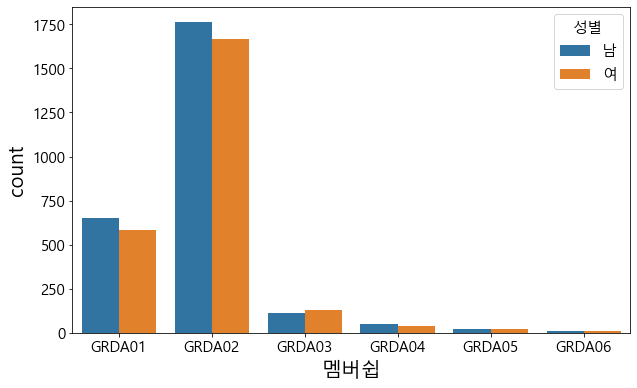

In [97]:
plt.figure(figsize=(10,6))
sns.countplot(data = df3[df3["가입년"] == 2016].sort_values(by=['멤버쉽']) , x = "멤버쉽",hue="성별")

<AxesSubplot:xlabel='멤버쉽', ylabel='count'>

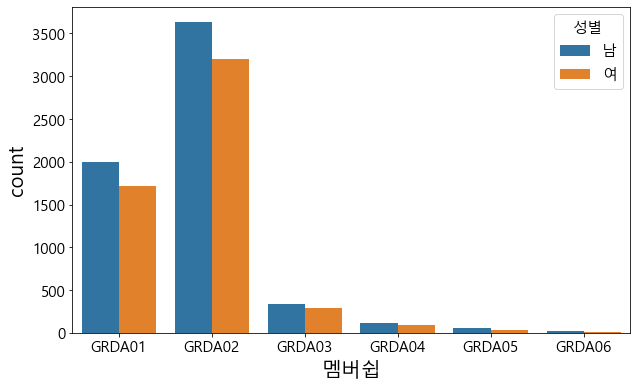

In [98]:
plt.figure(figsize=(10,6))
sns.countplot(data = df3[df3["가입년"] == 2017].sort_values(by=['멤버쉽']) , x = "멤버쉽",hue="성별")